In [6]:
import os
import sys
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sys.path.append('../src/')
import CONST
regex = re.compile('[^a-zA-Z0-9]')
from _000_preprocess import _000_preprocess

In [7]:
trn_path, tst_path = _000_preprocess()
trn = pd.read_feather(trn_path)
tst = pd.read_feather(tst_path)

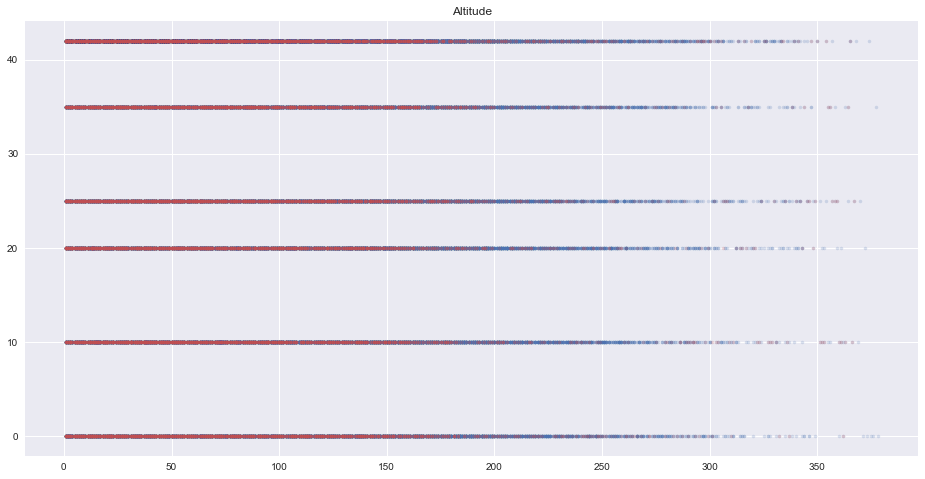

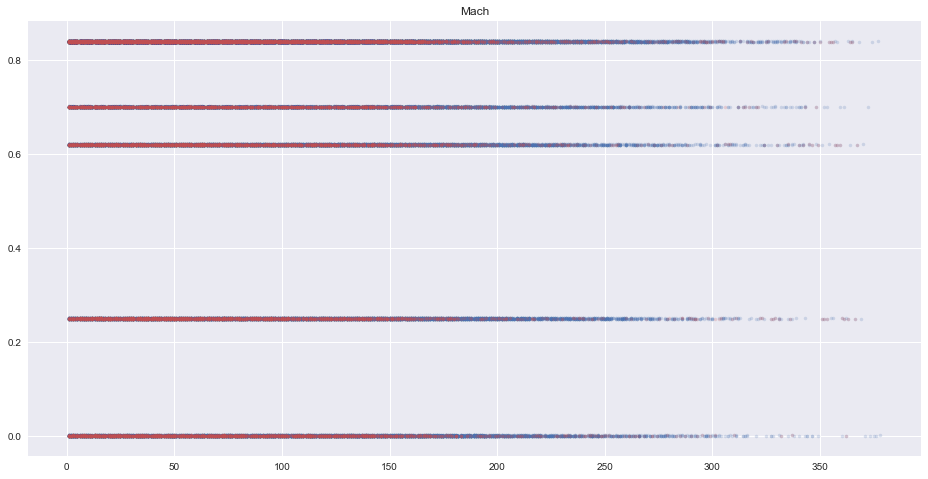

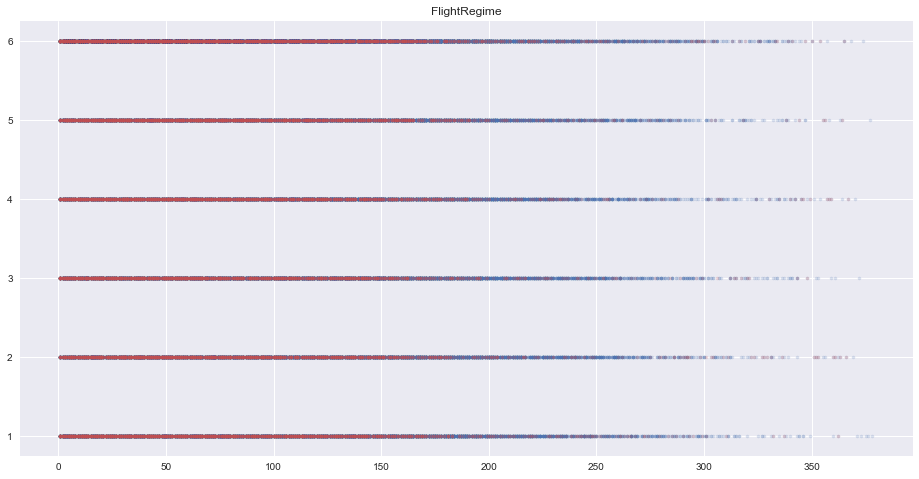

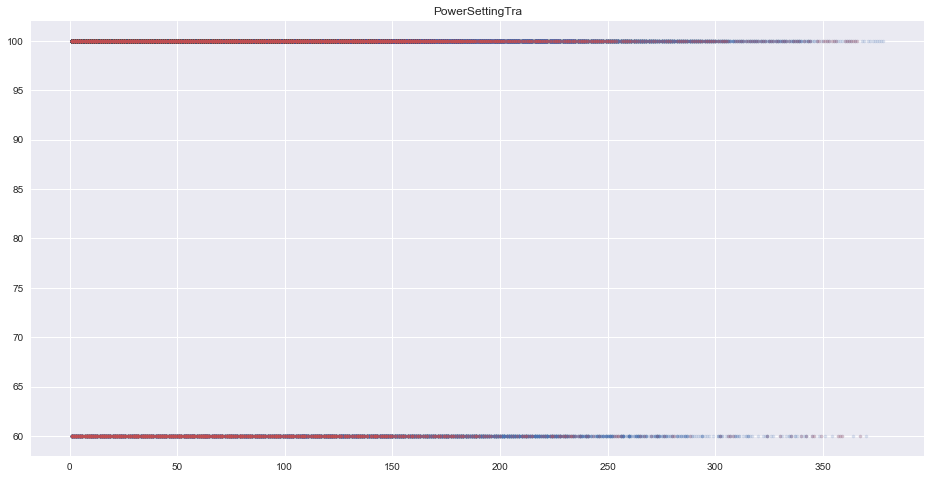

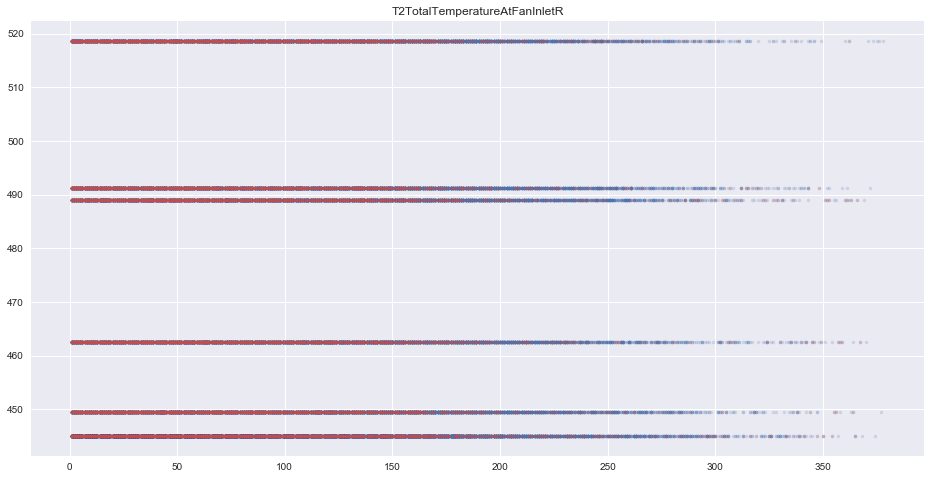

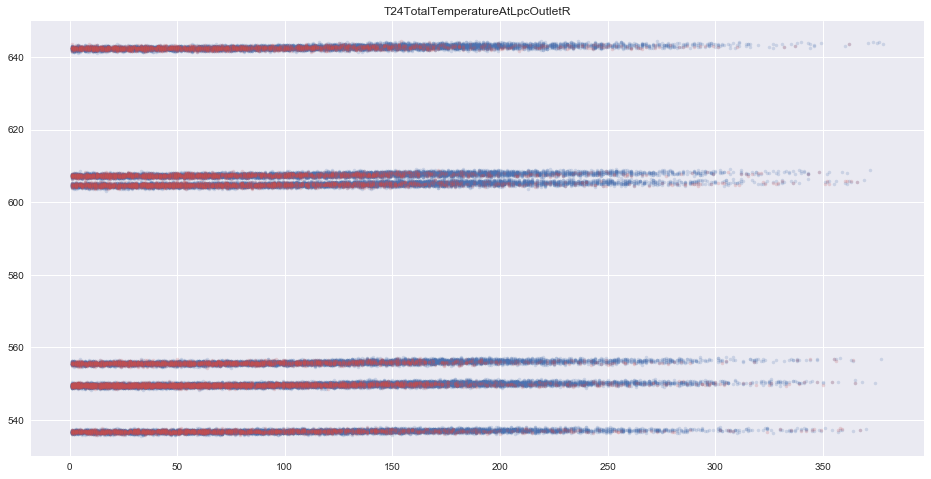

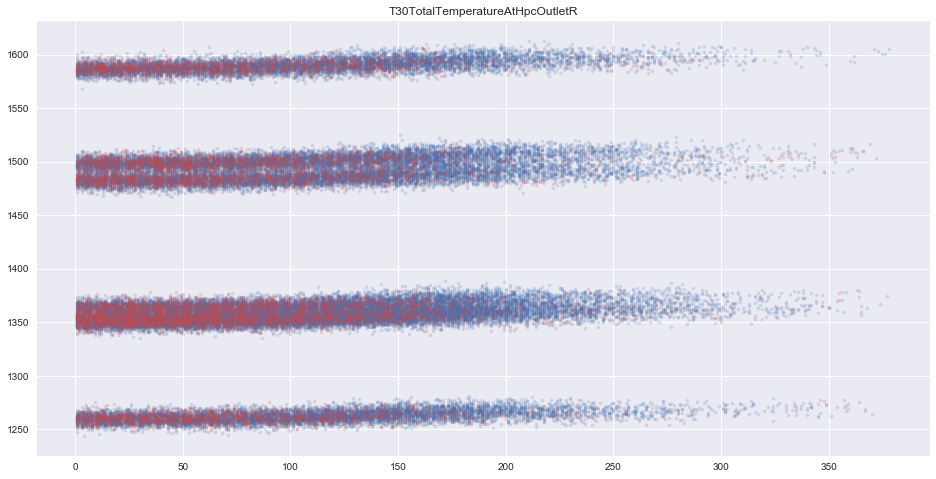

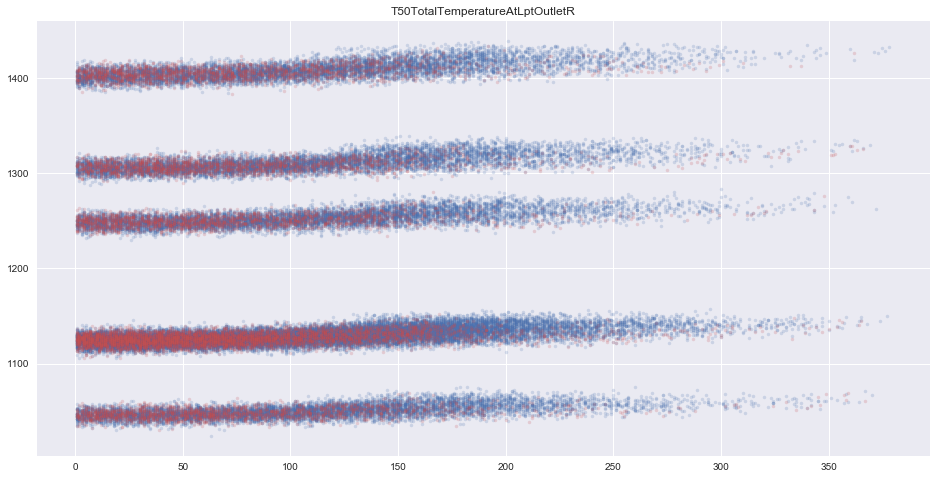

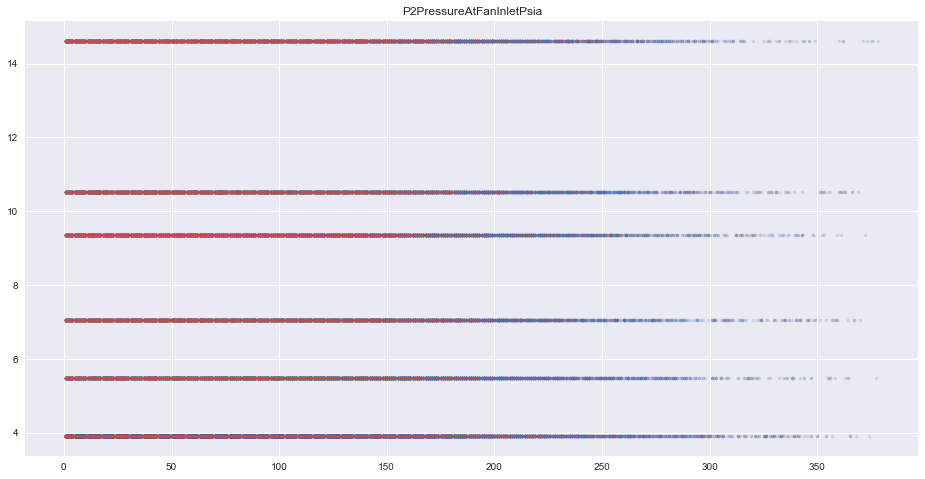

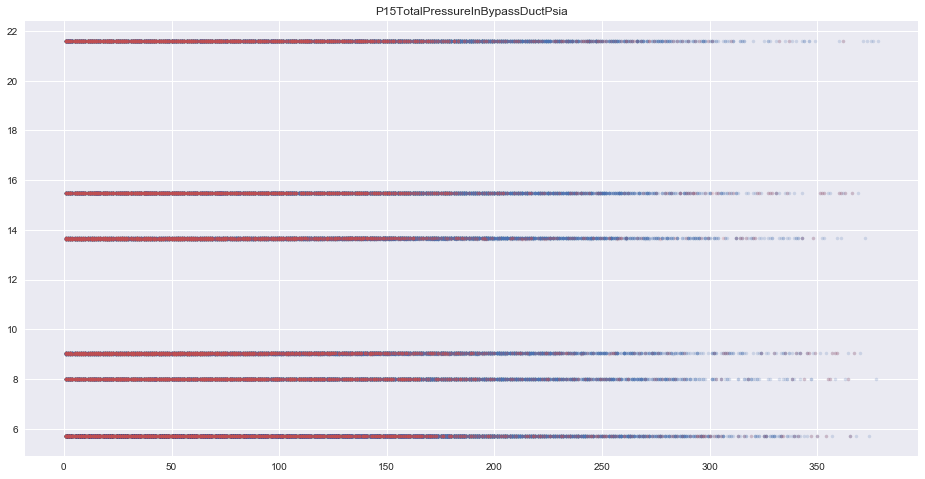

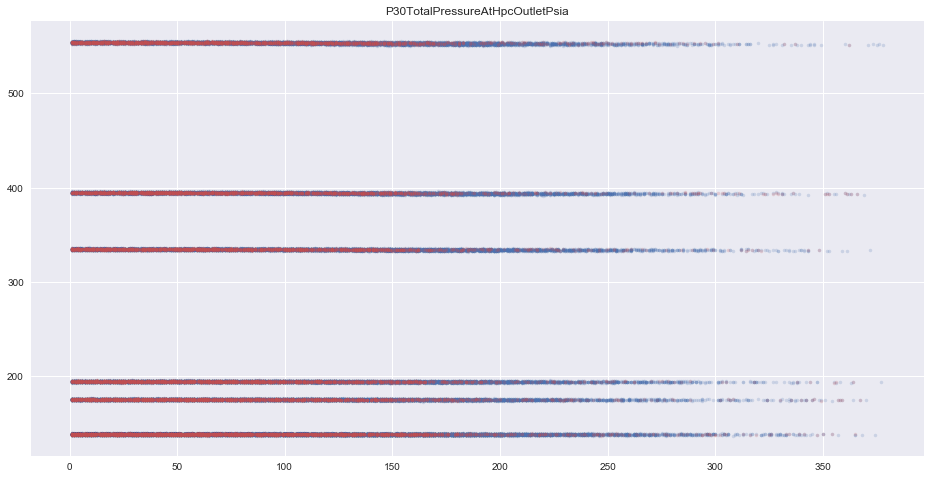

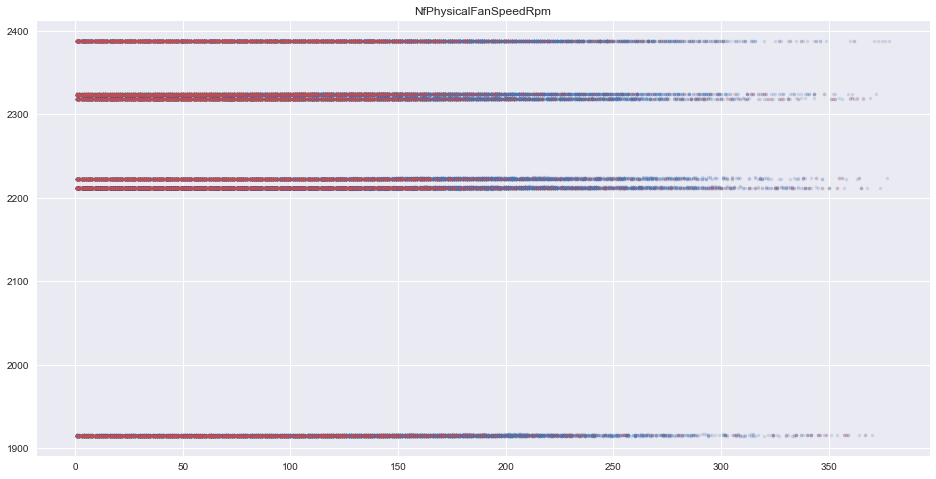

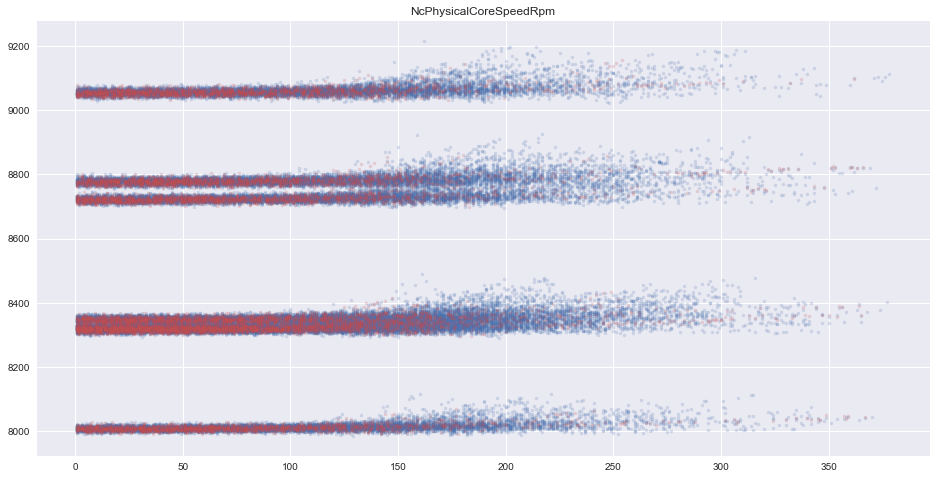

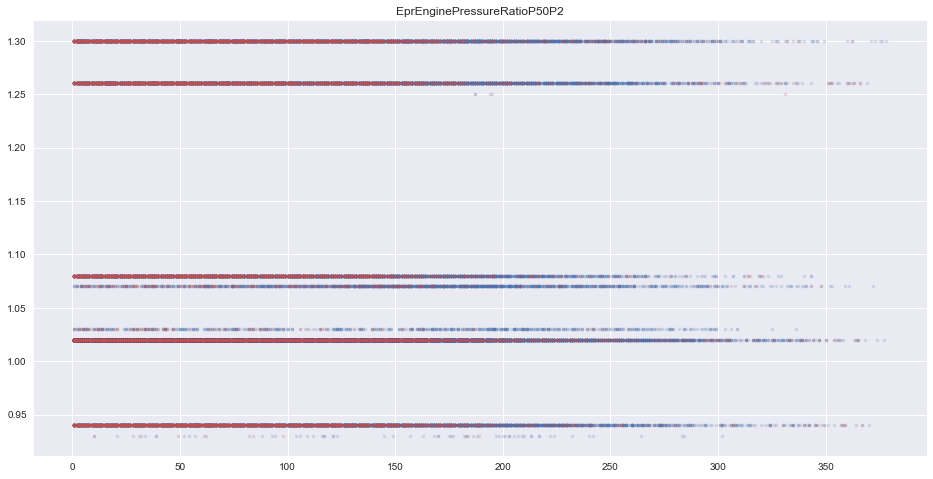

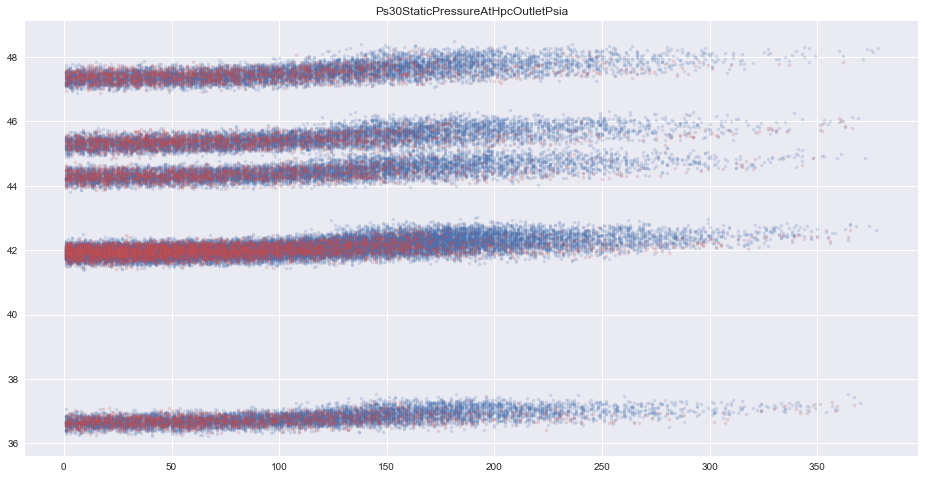

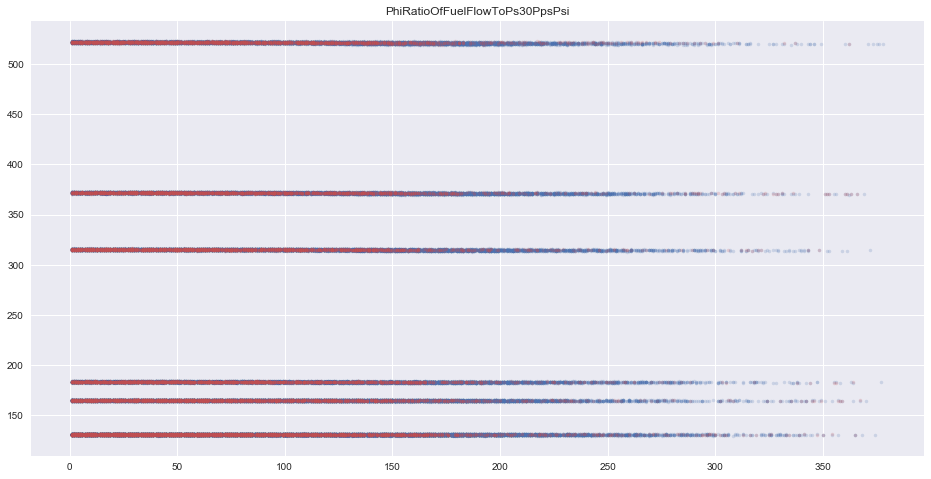

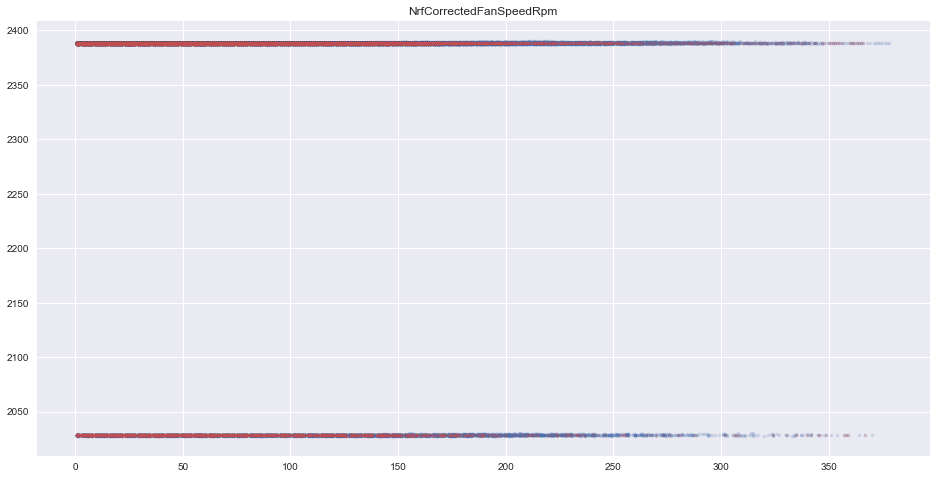

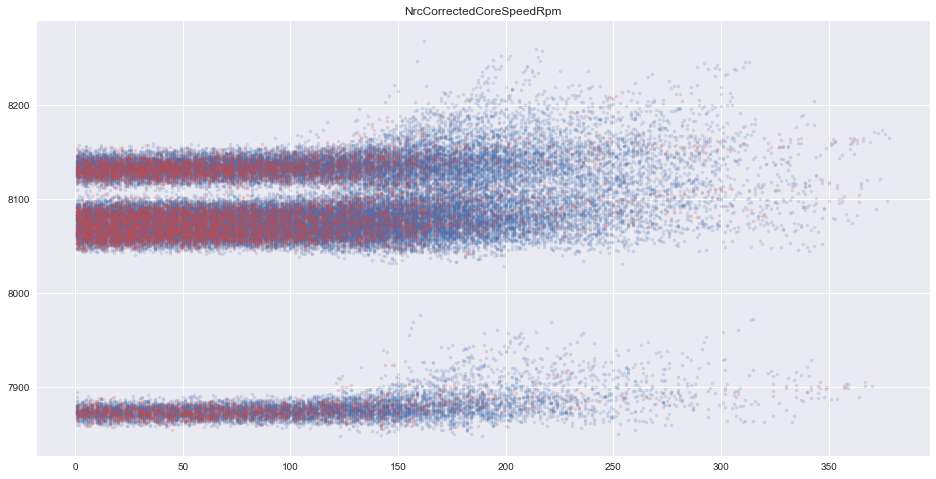

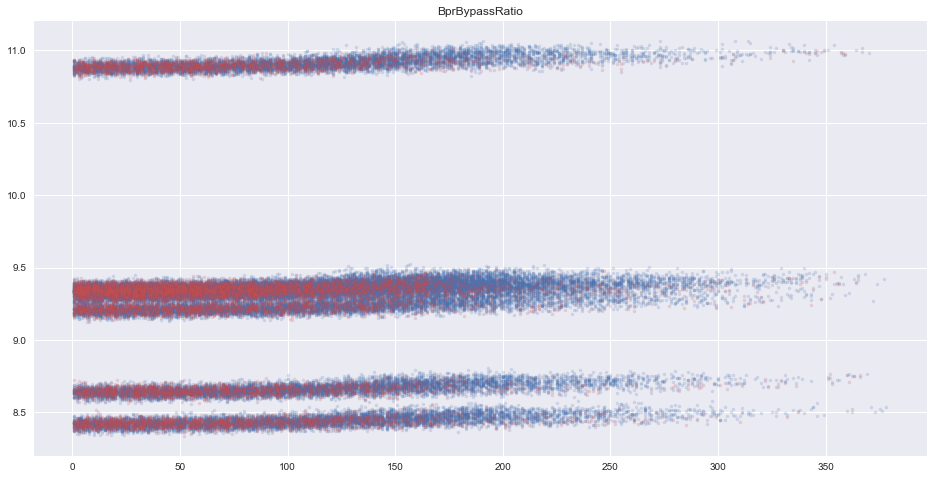

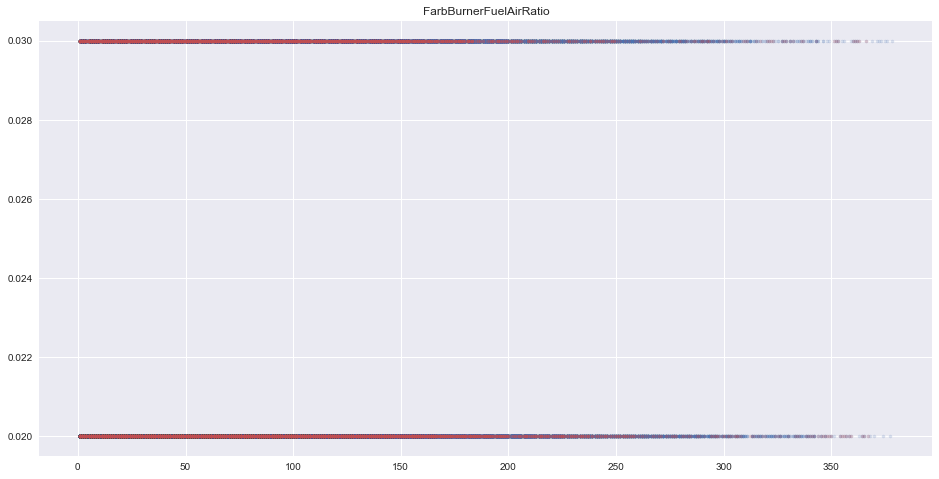

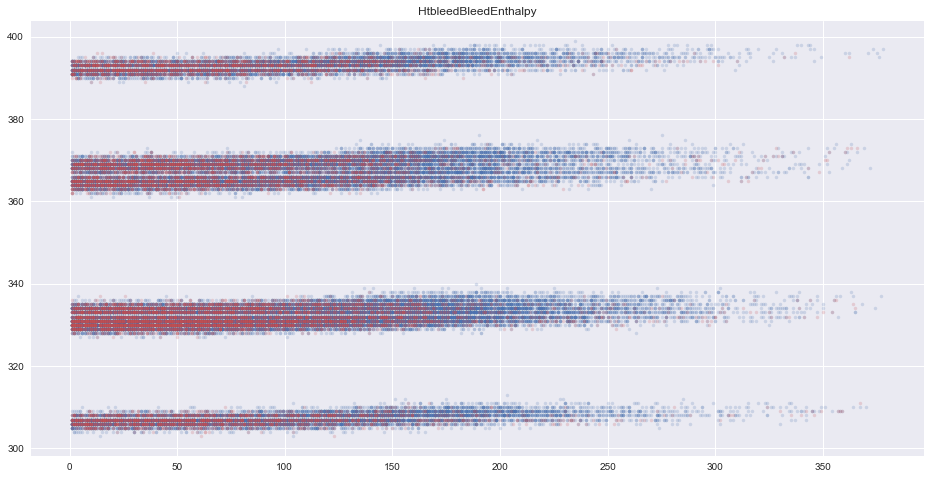

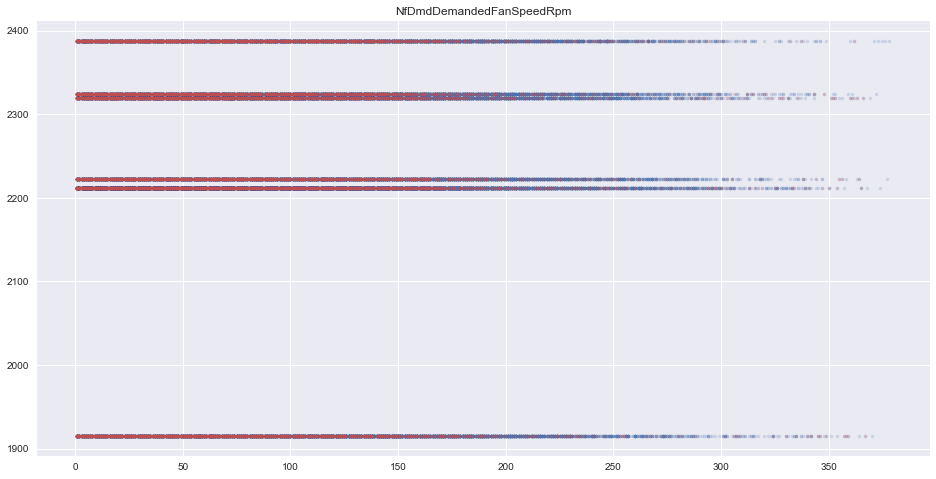

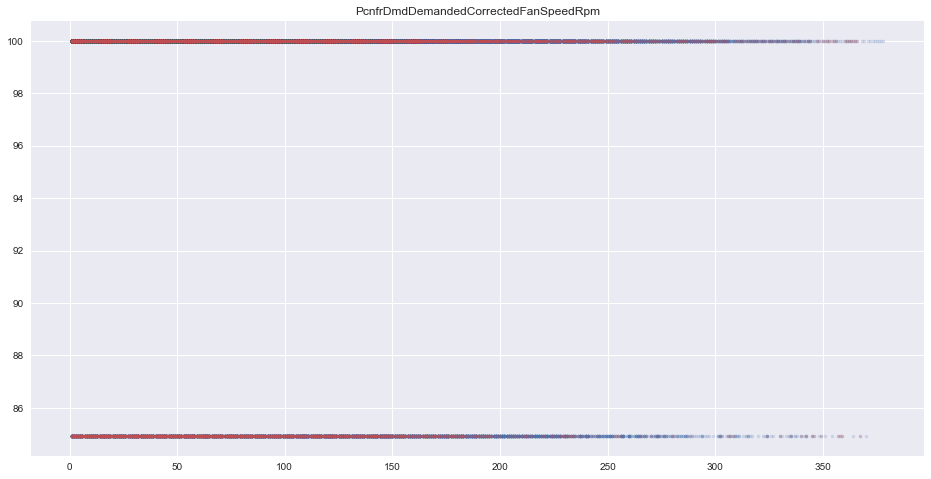

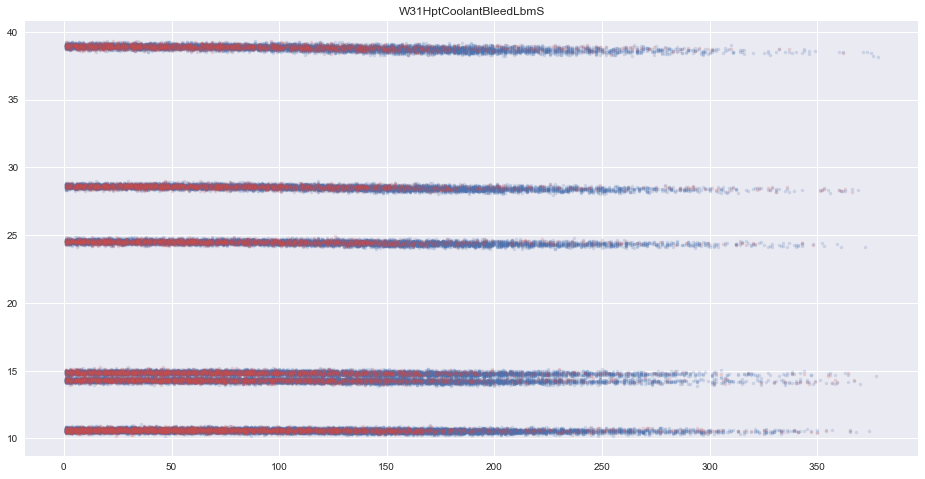

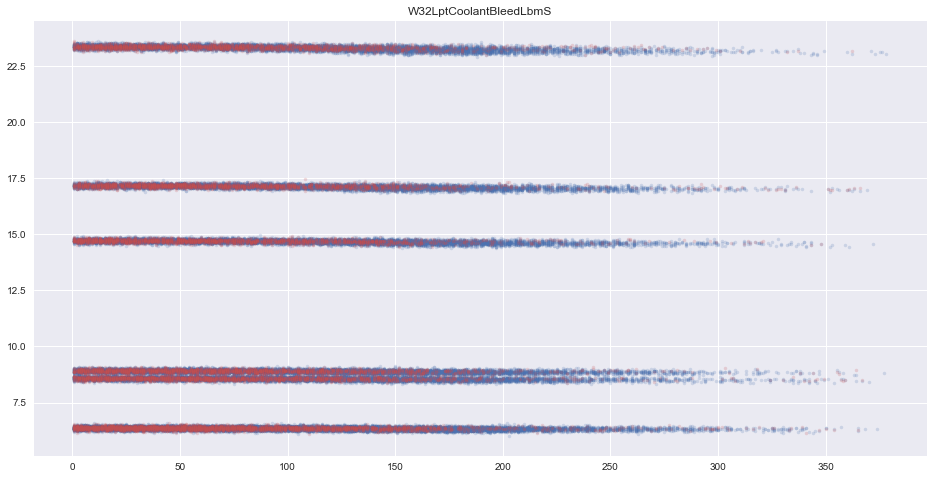

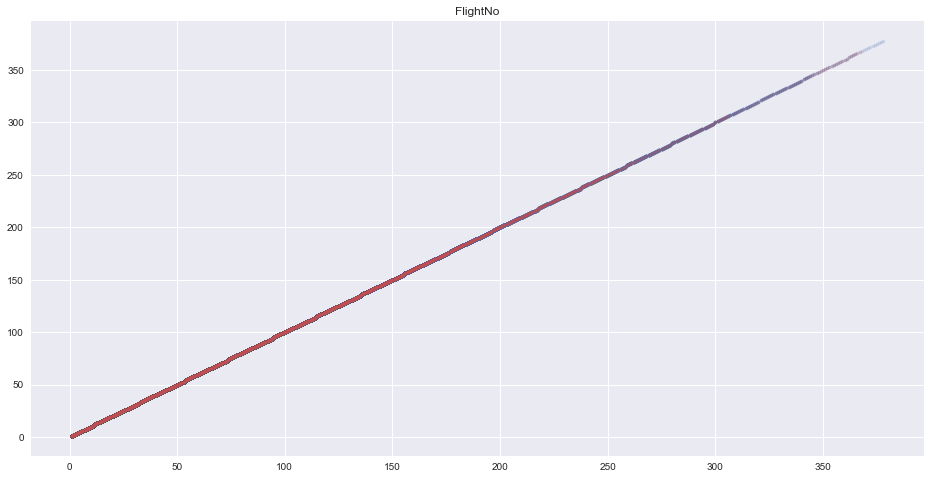

In [8]:
cp = sns.color_palette()
# 数値データに関して時系列プロットを行う, TrainとTestで色分け
for c in trn.columns[trn.dtypes != object]:
    plt.figure(figsize=(16, 8))
    plt.title(c)
    for e, g in trn.groupby('Engine'):
        plt.plot(g['FlightNo'], g[c], '.', c=cp[0], alpha=.2)
    for e, g in tst.groupby('Engine'):
        plt.plot(g['FlightNo'], g[c], '.', c=cp[2], alpha=.2)
    plt.show()

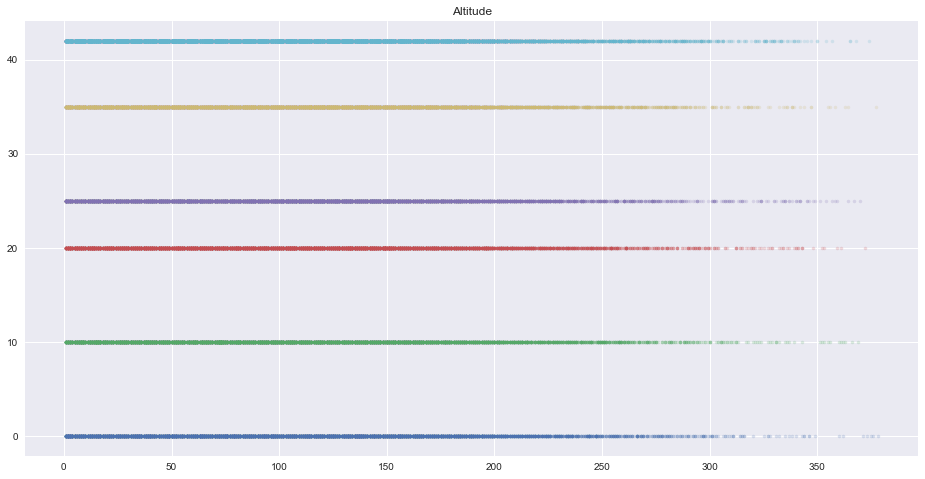

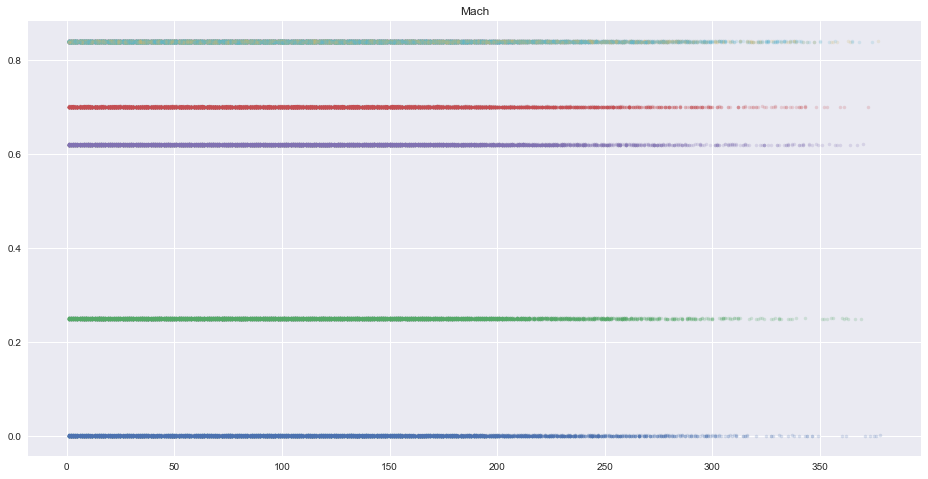

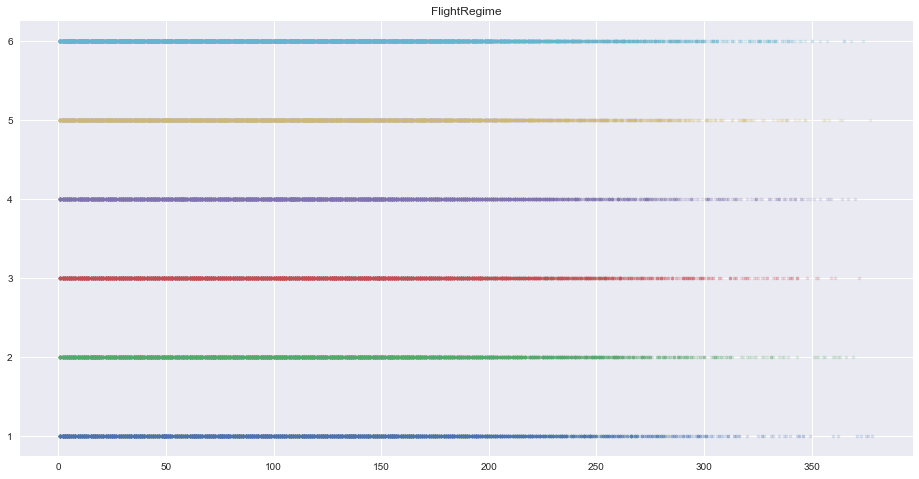

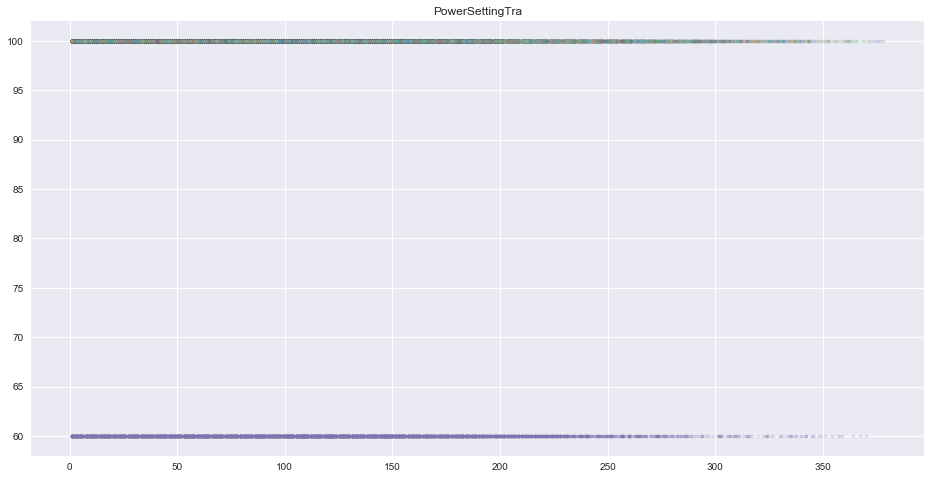

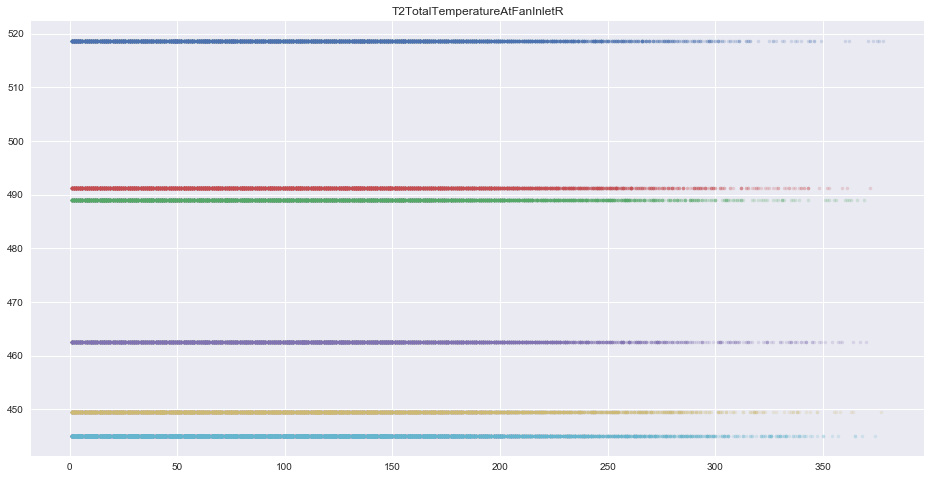

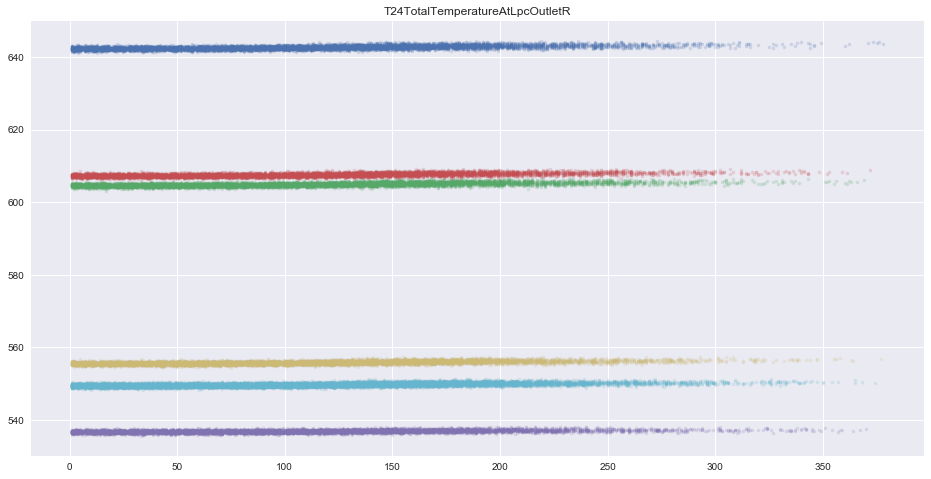

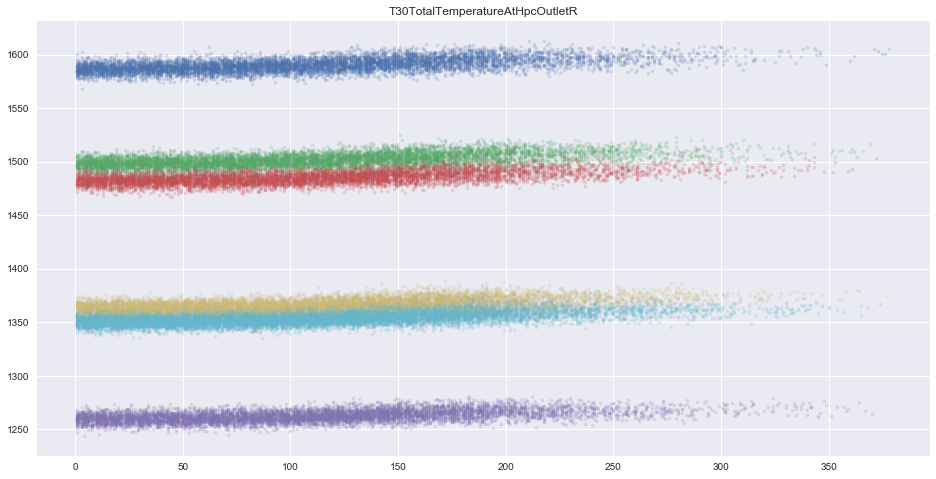

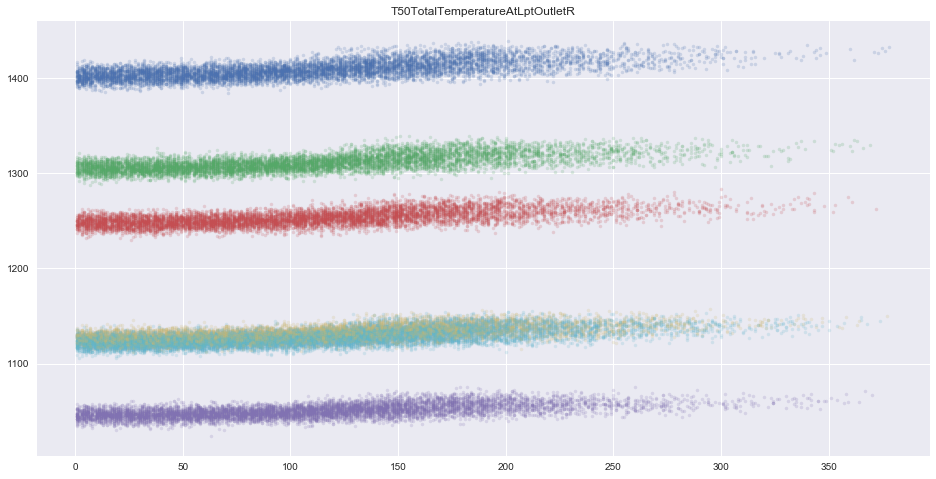

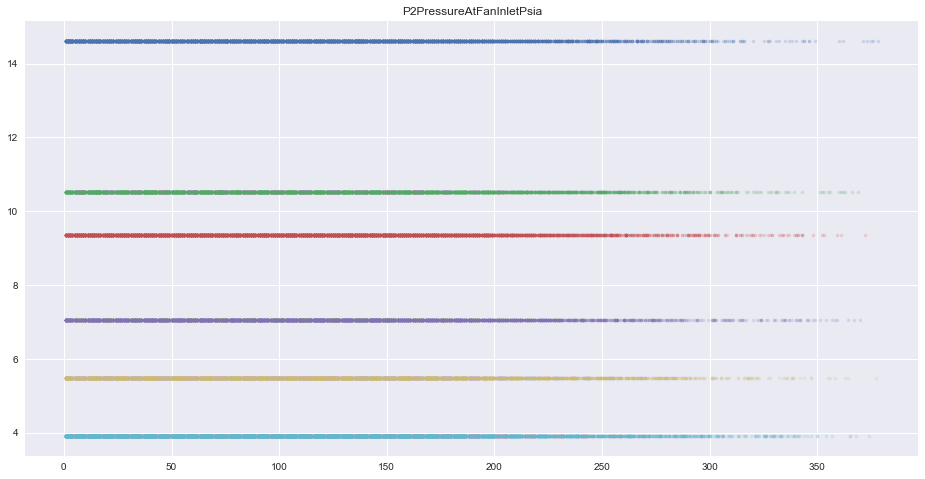

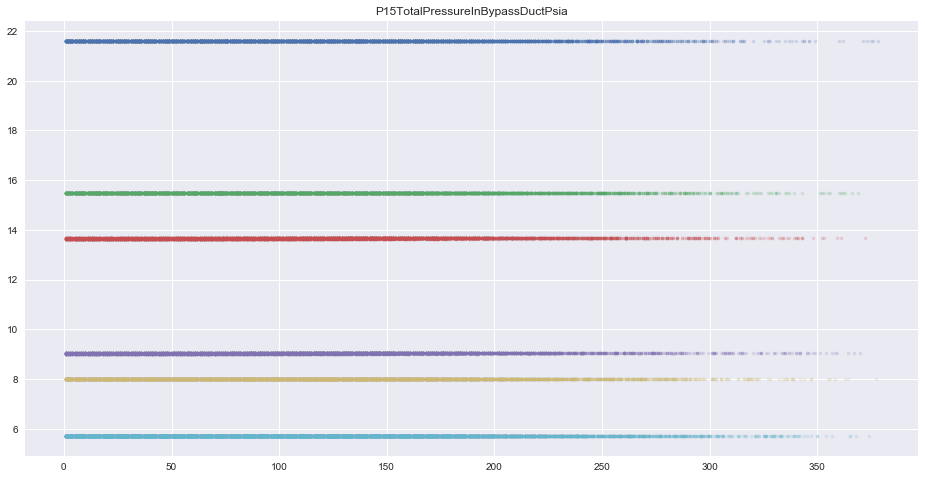

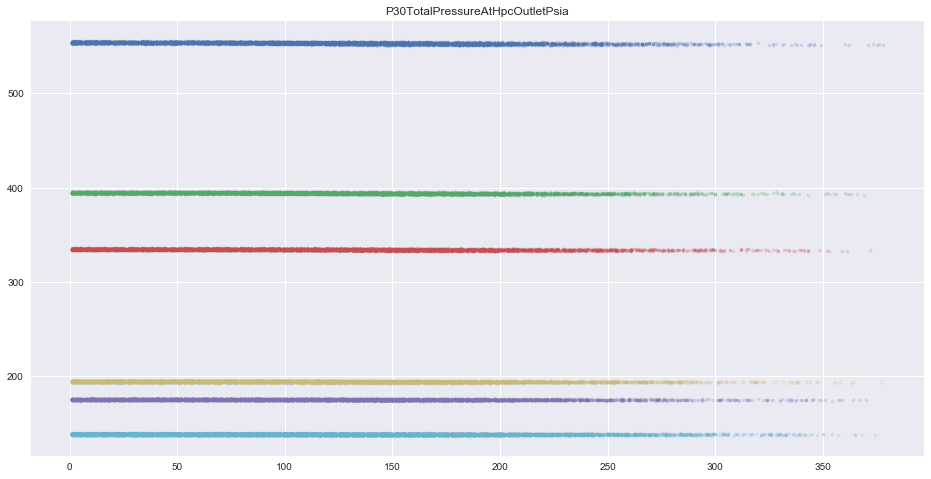

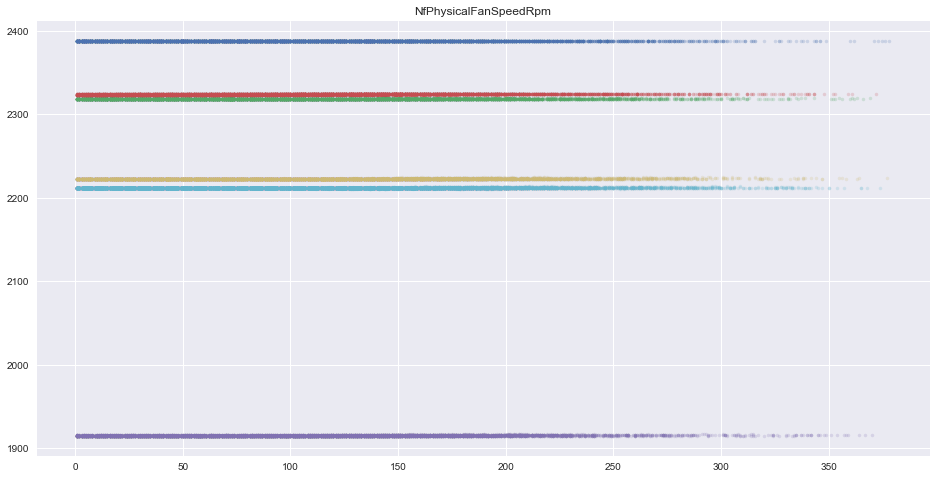

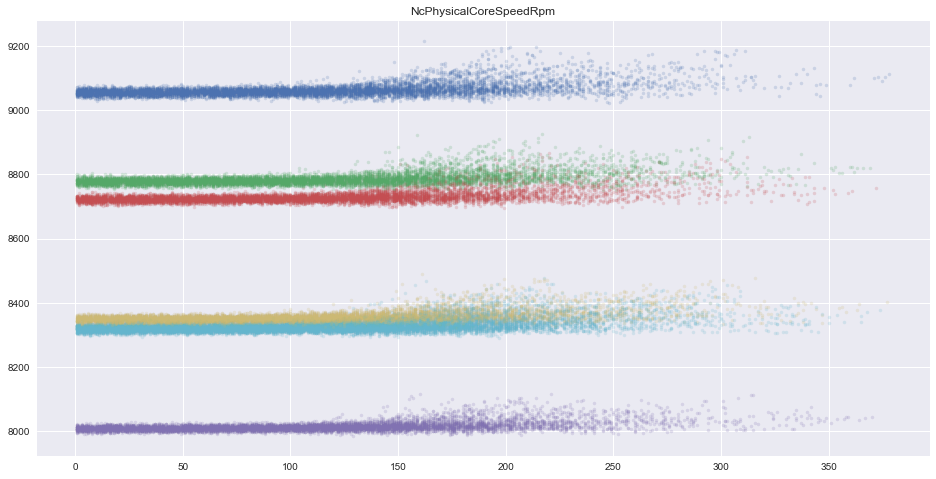

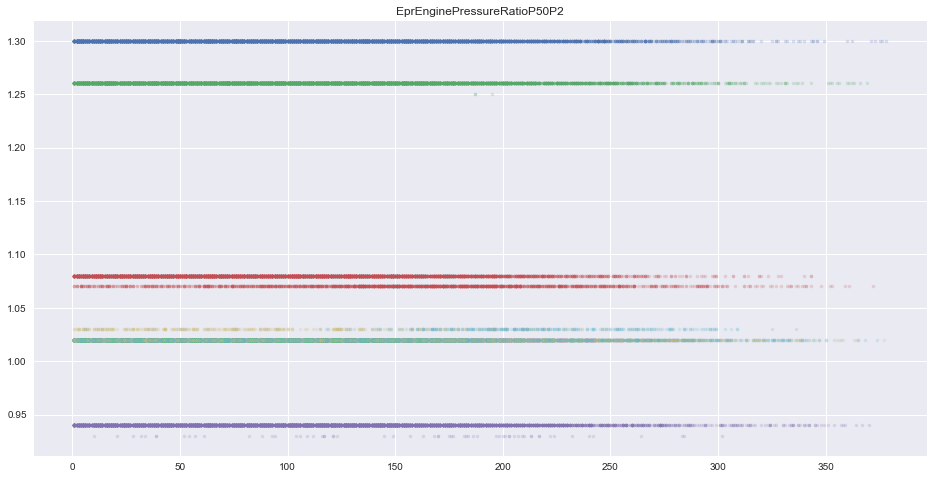

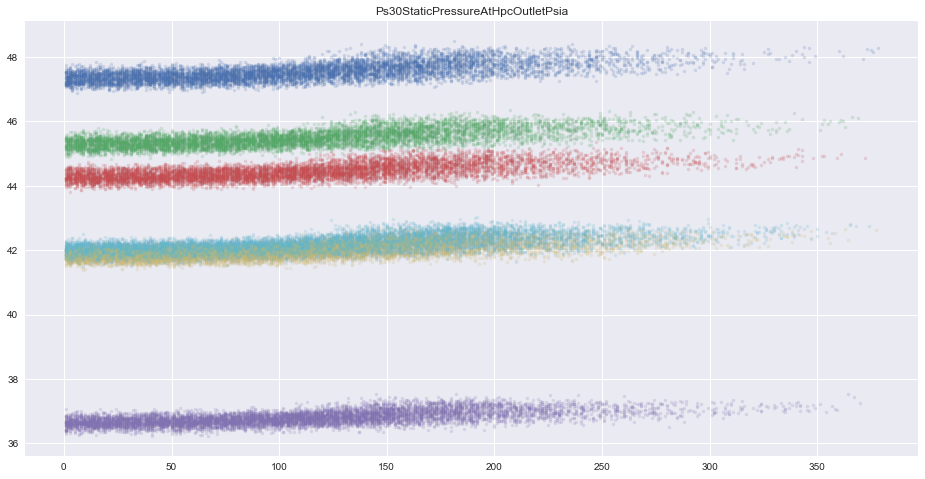

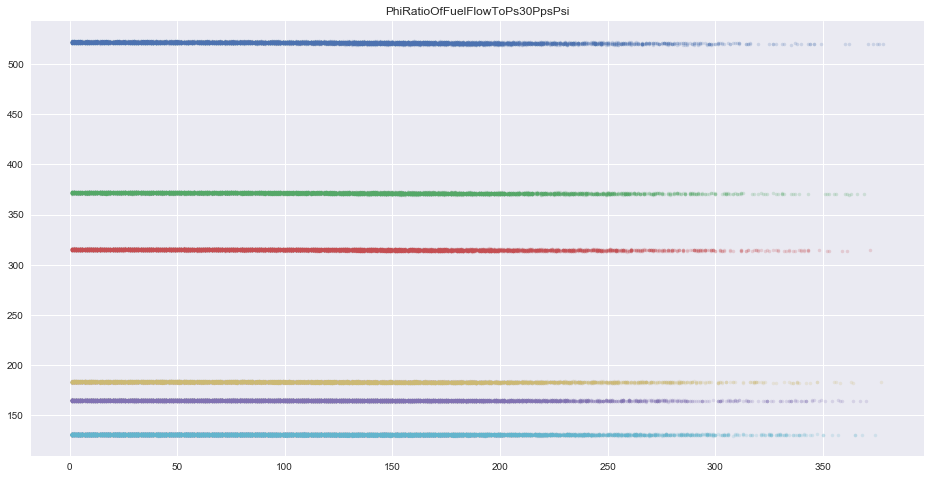

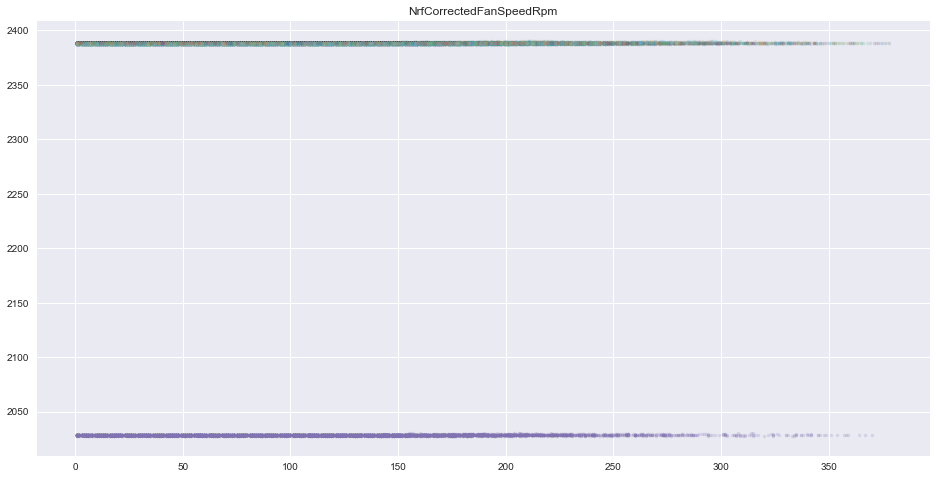

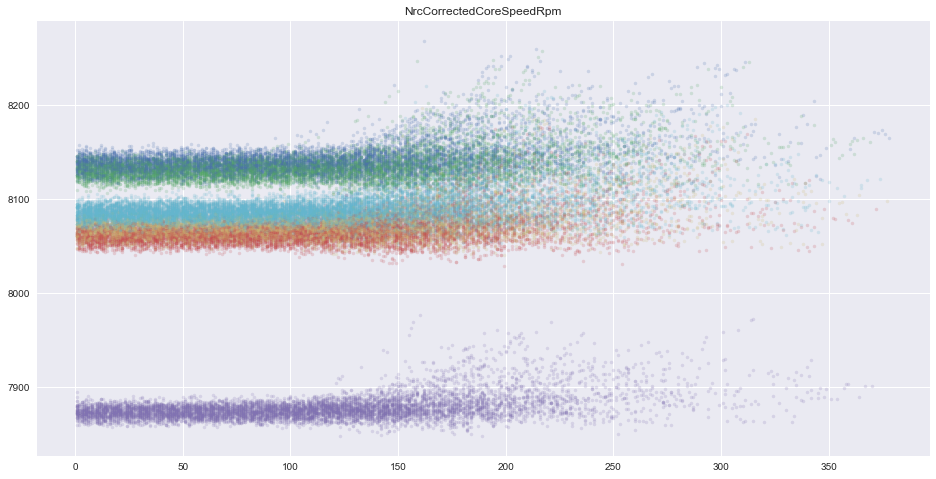

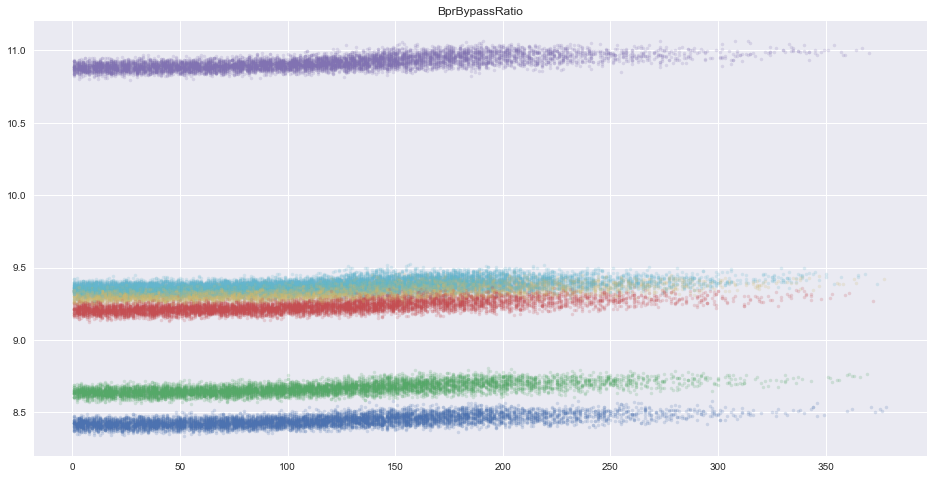

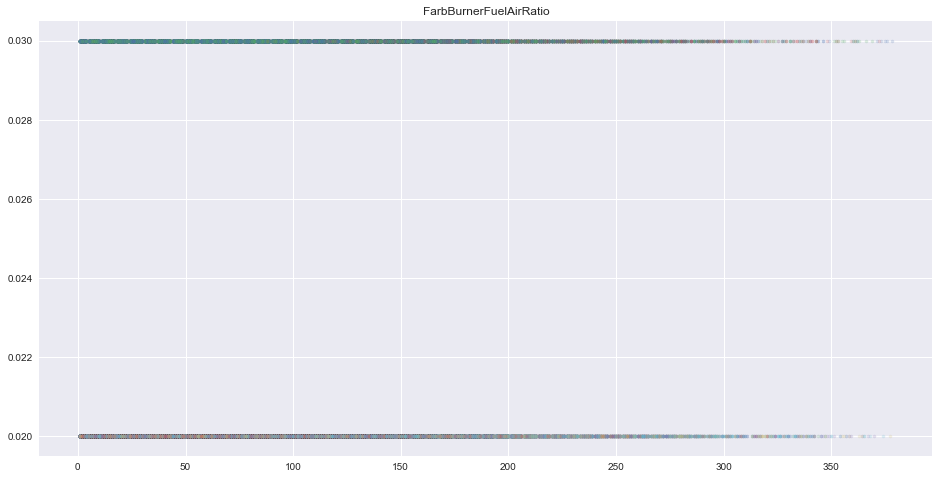

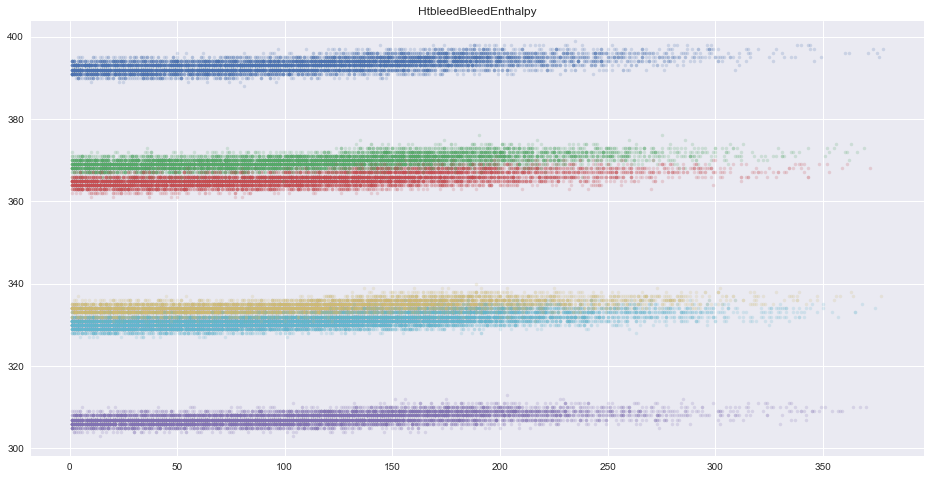

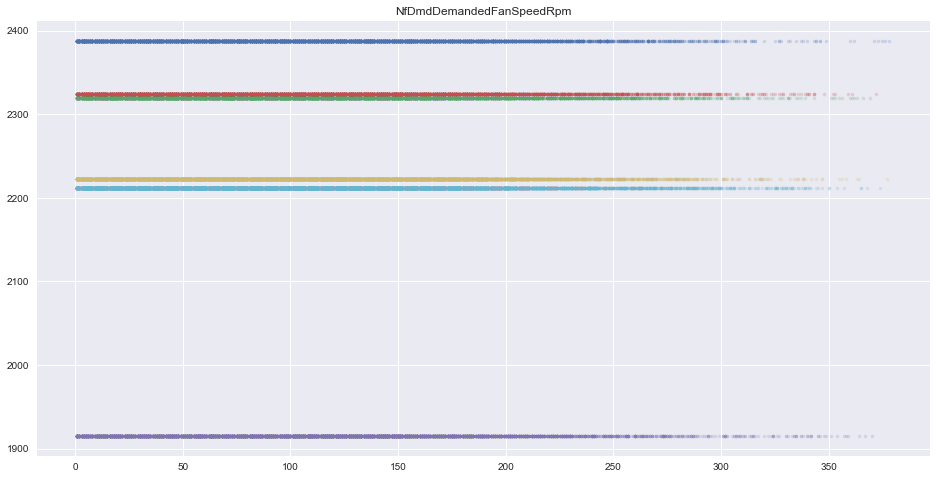

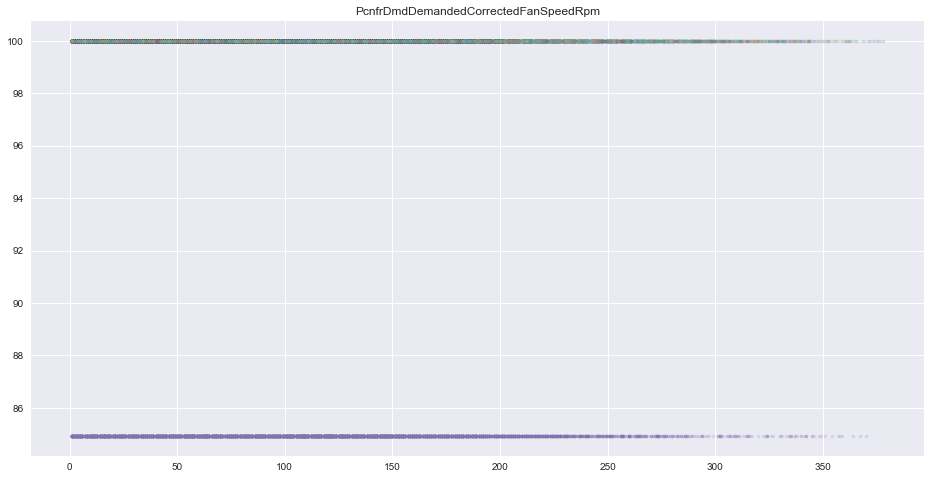

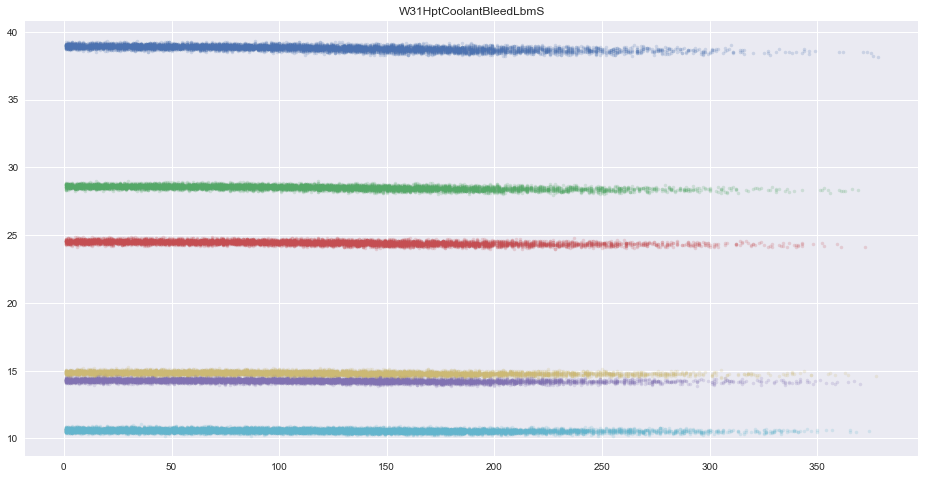

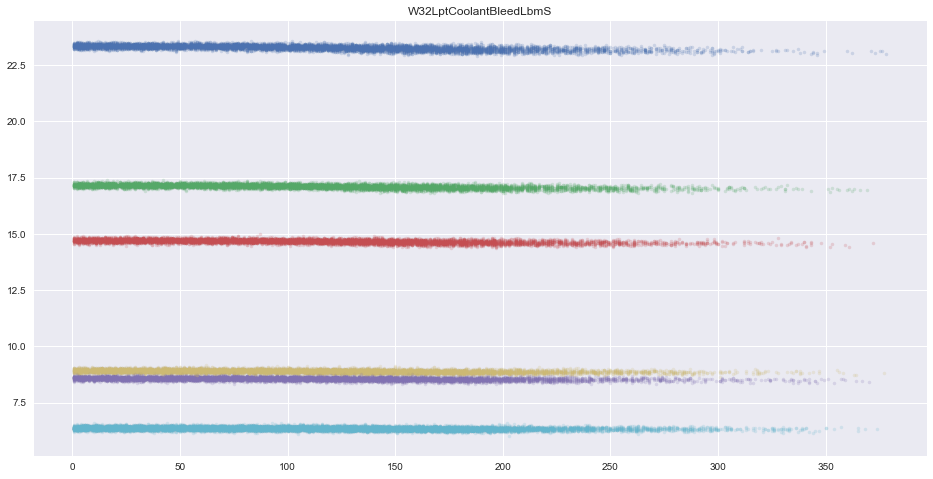

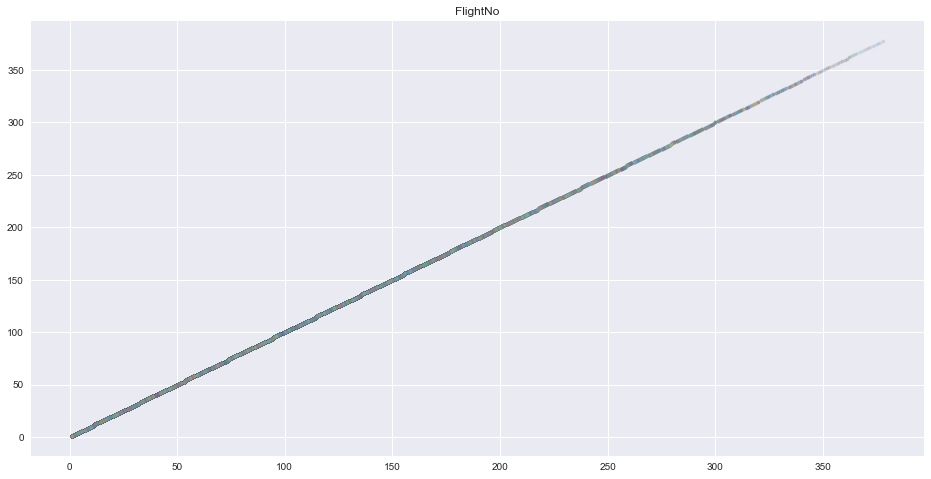

In [9]:
cp = sns.color_palette(n_colors=6)
# 数値データに関して時系列プロットを行う, Regimeで色分け
for c in trn.columns[trn.dtypes != object]:
    plt.figure(figsize=(16, 8))
    plt.title(c)
    for e, g in trn.groupby('Engine'):
        for r, _g in g.groupby(['FlightRegime']):
            plt.plot(_g['FlightNo'], _g[c], '.', c=cp[r-1], alpha=.2)
    plt.show()

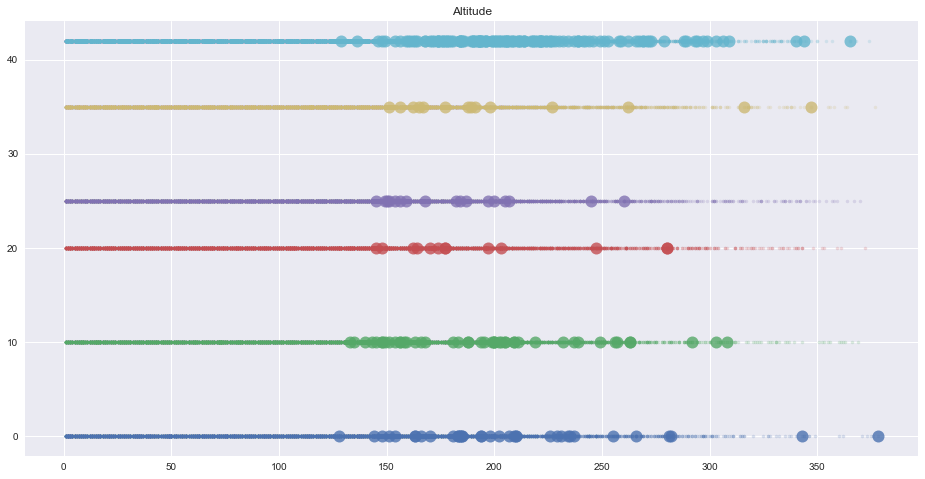

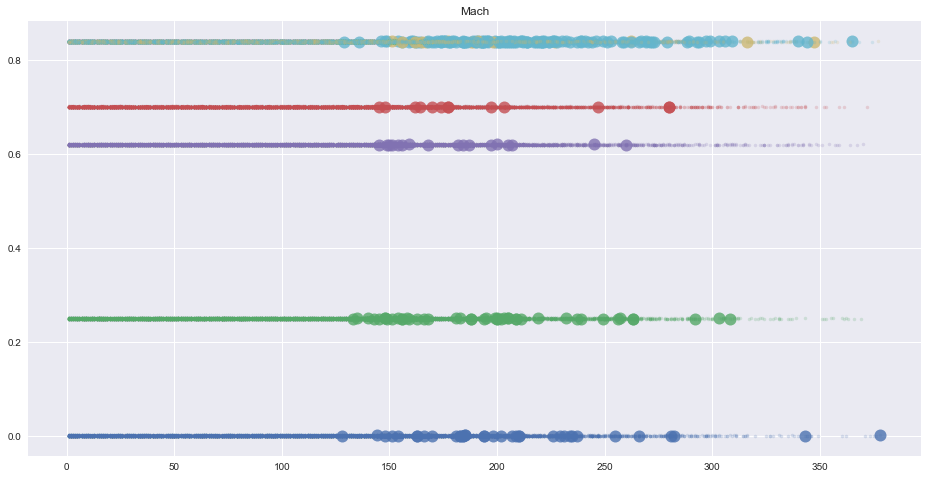

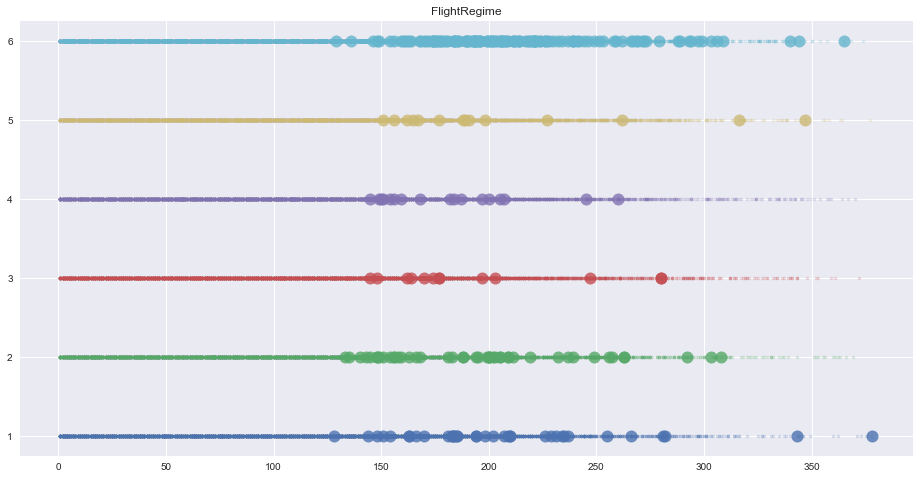

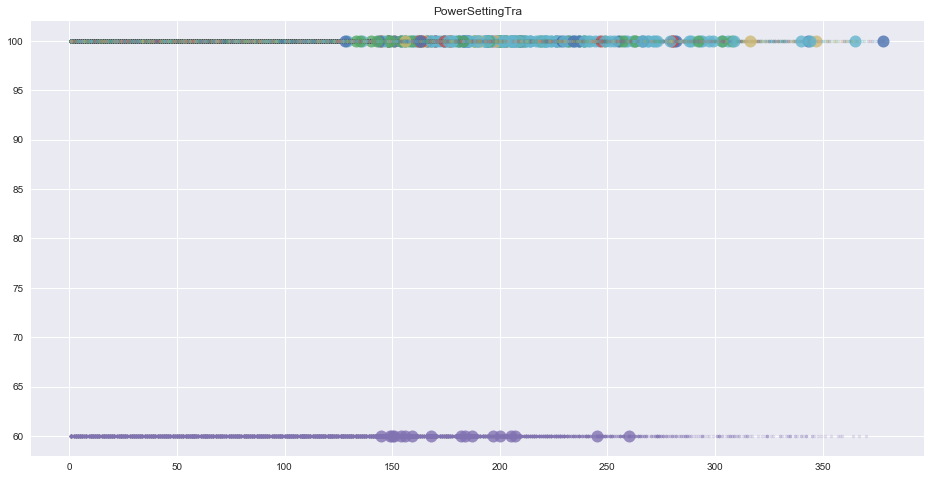

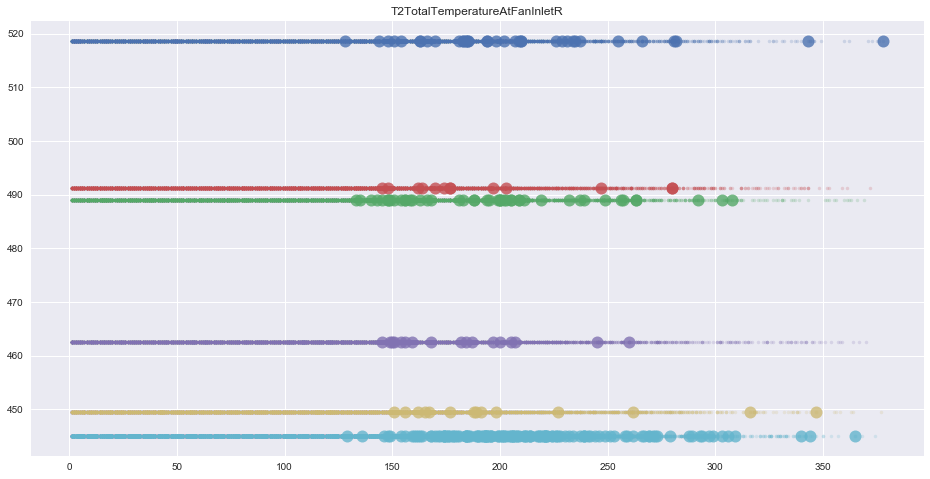

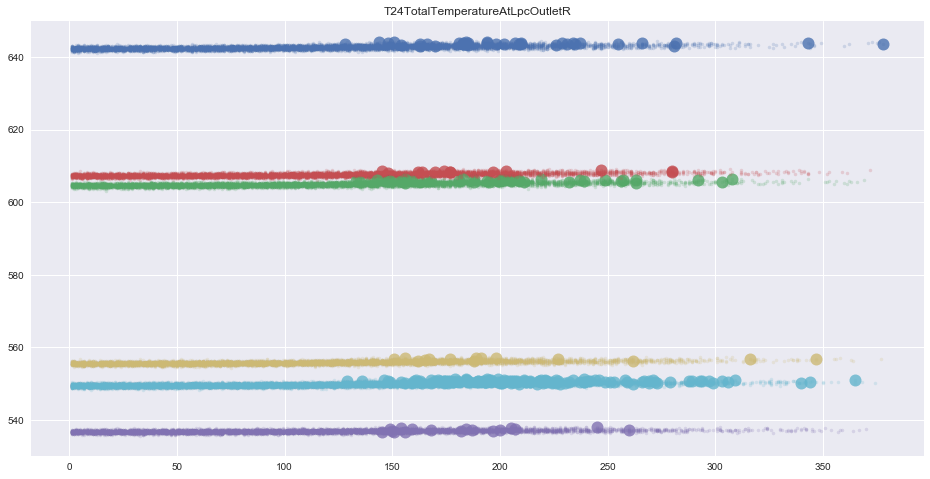

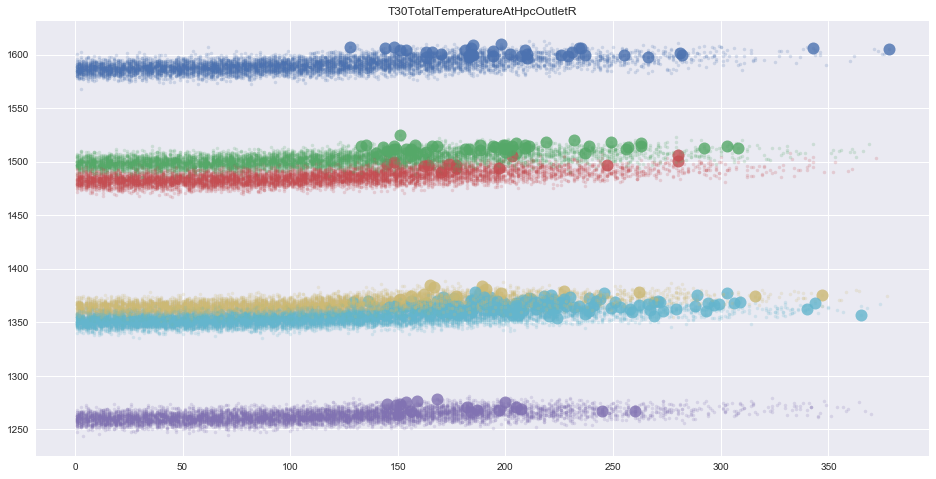

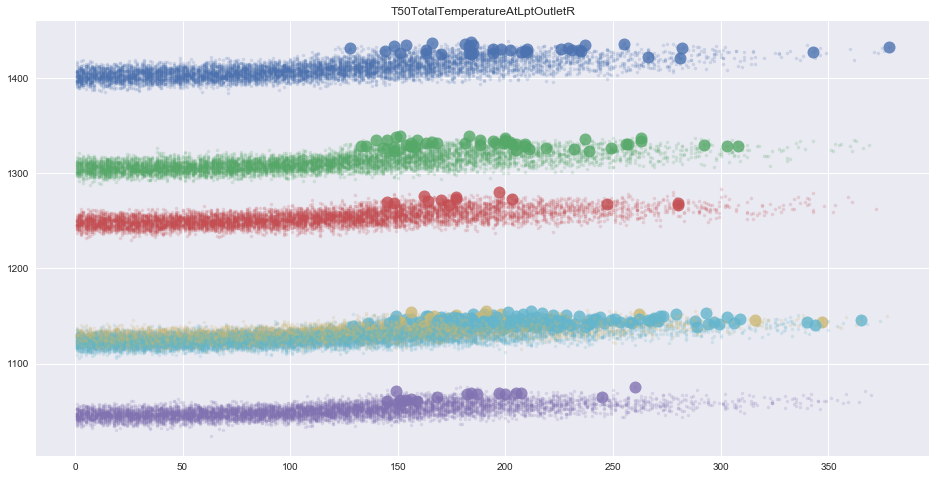

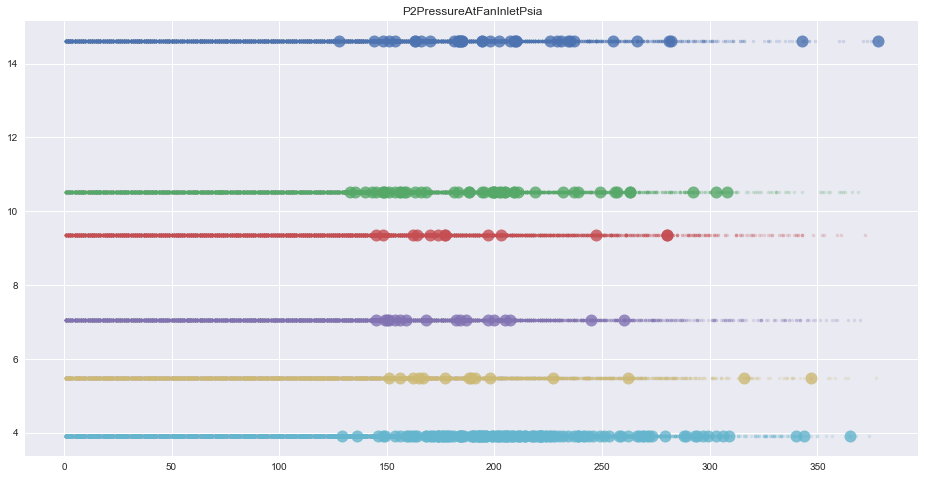

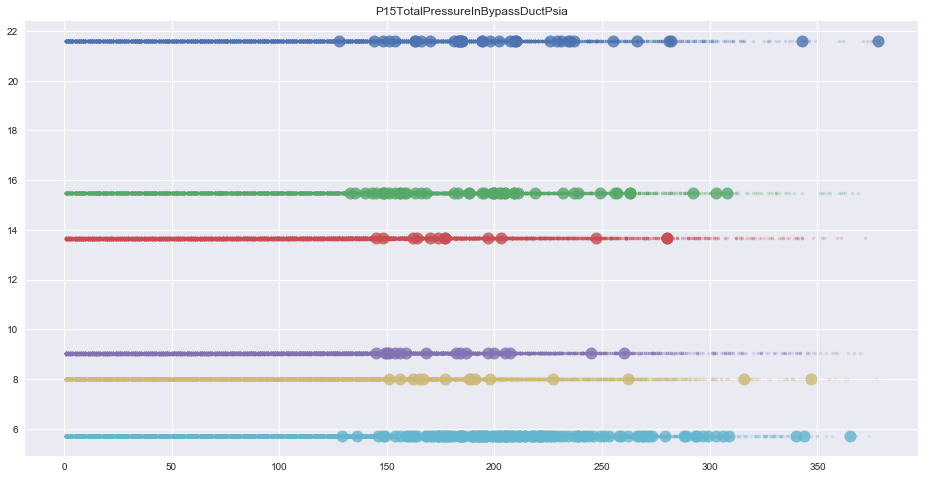

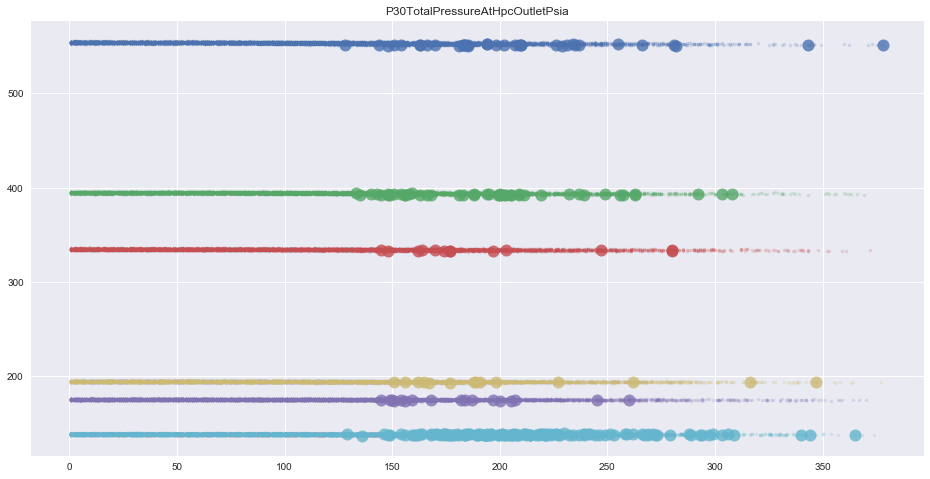

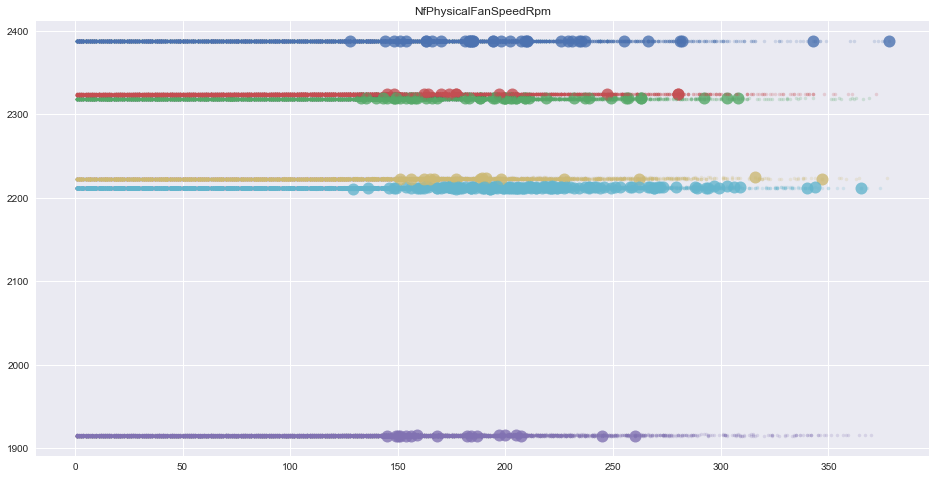

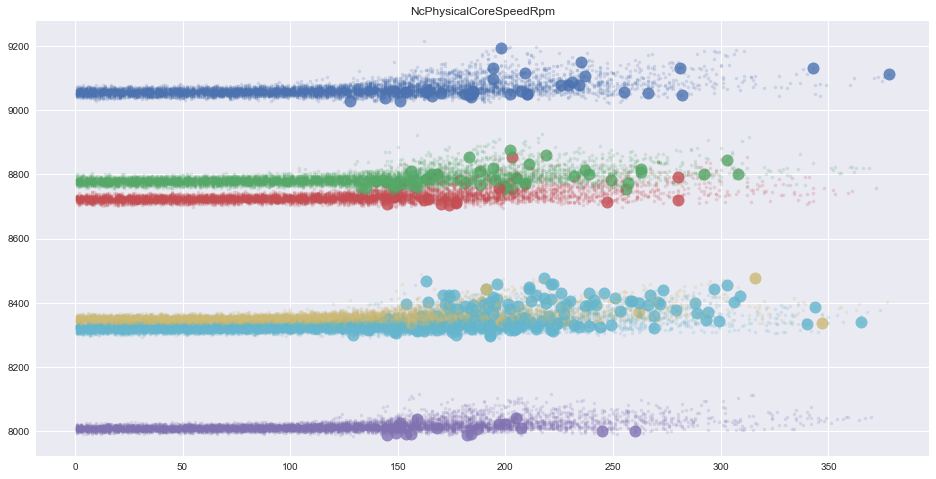

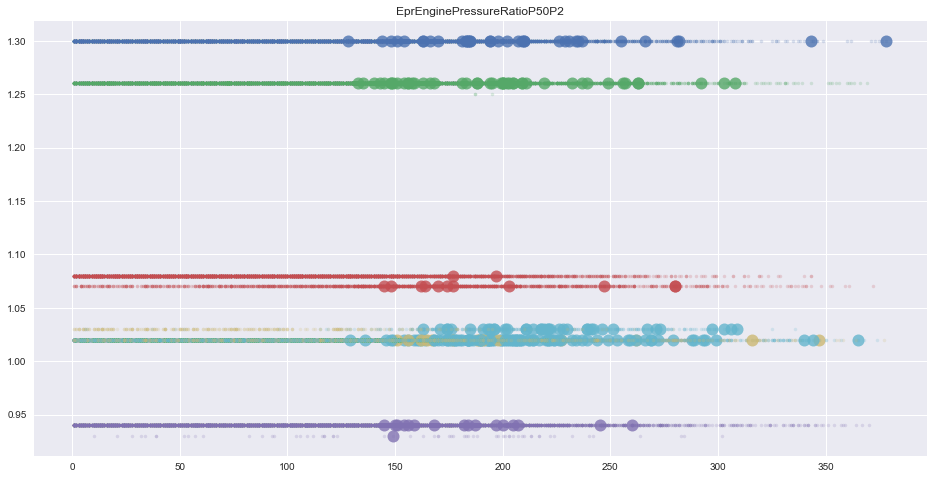

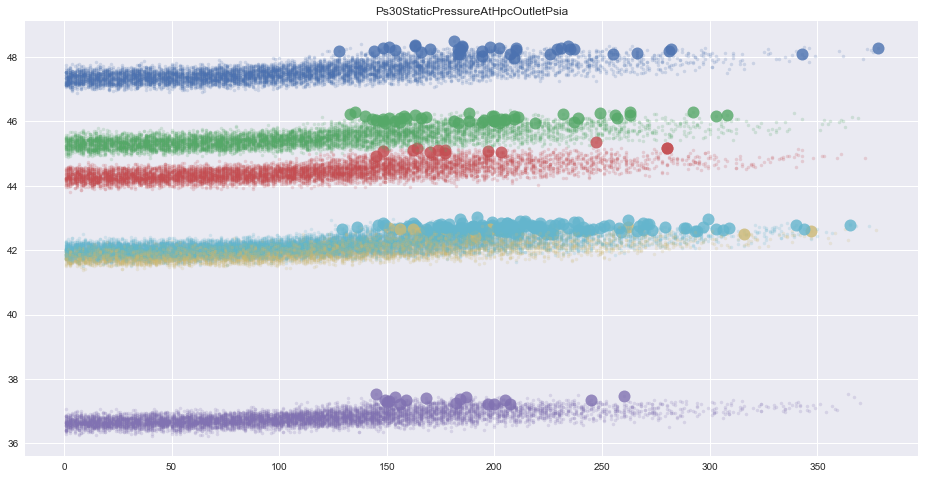

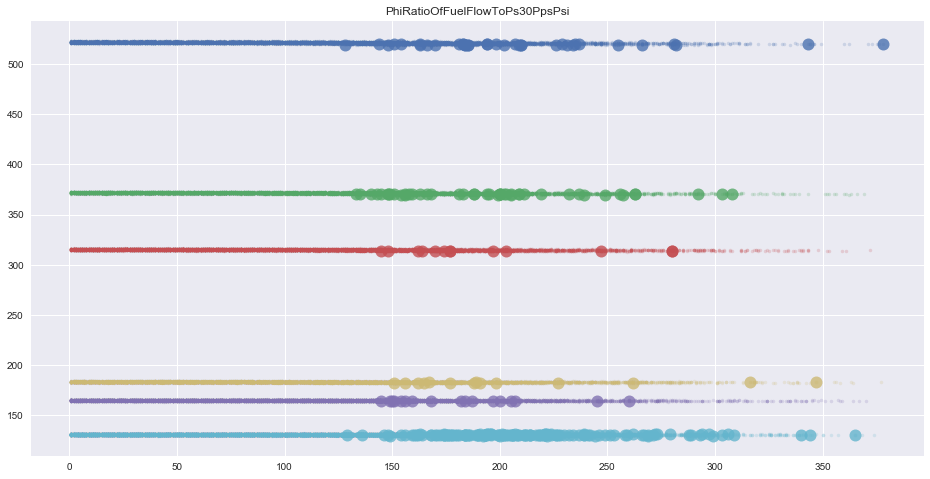

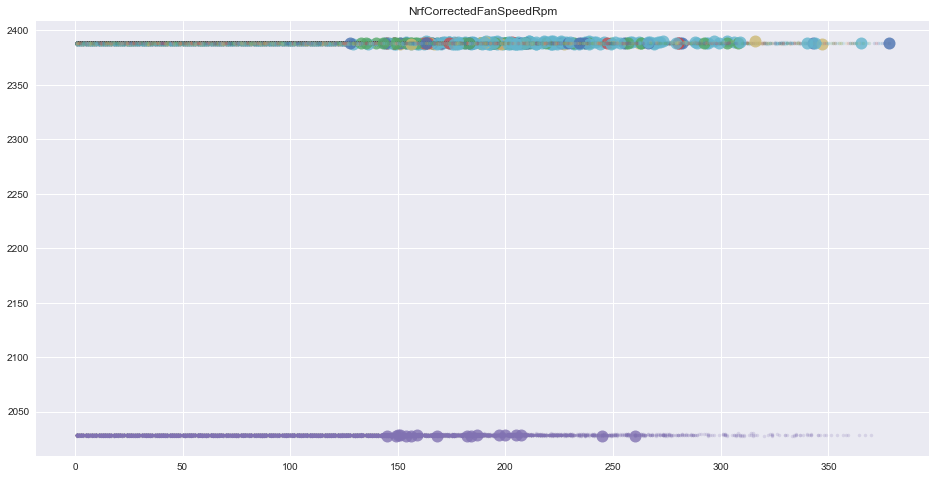

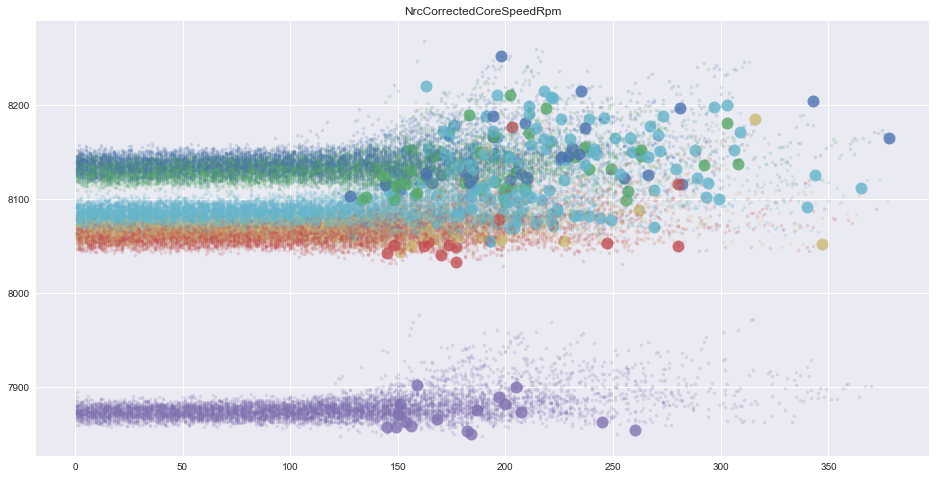

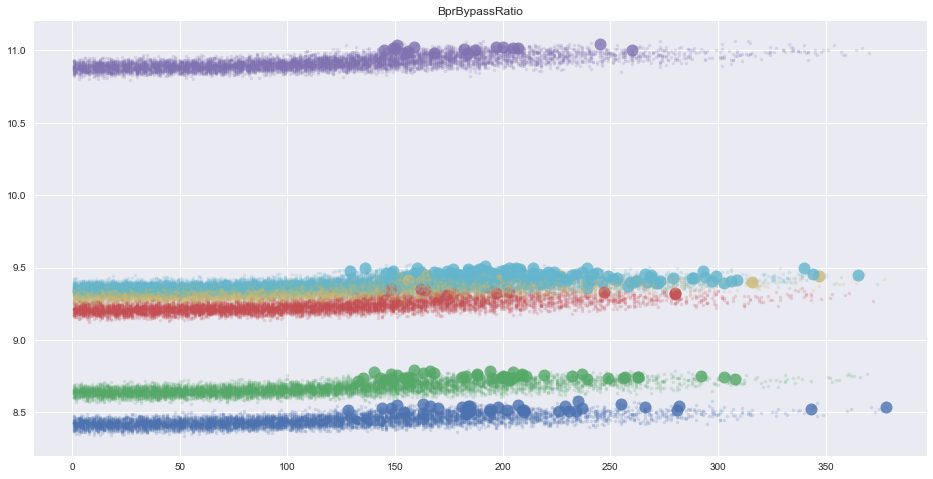

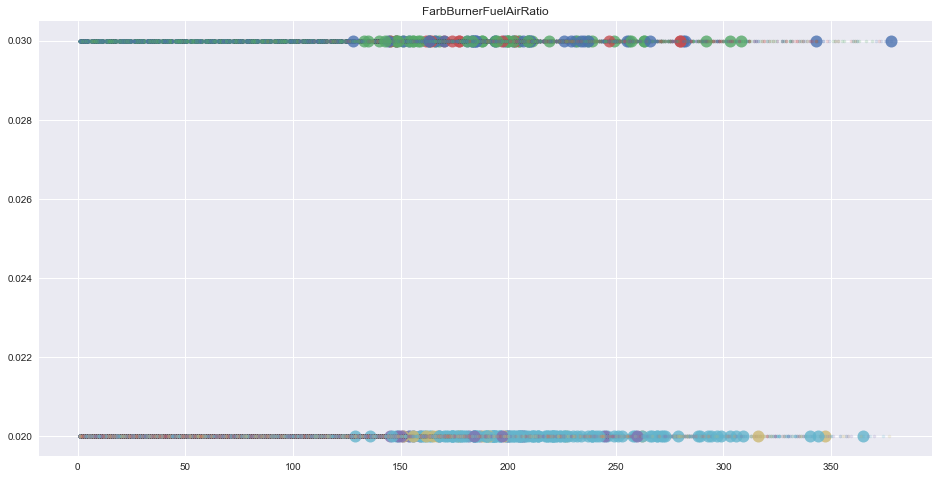

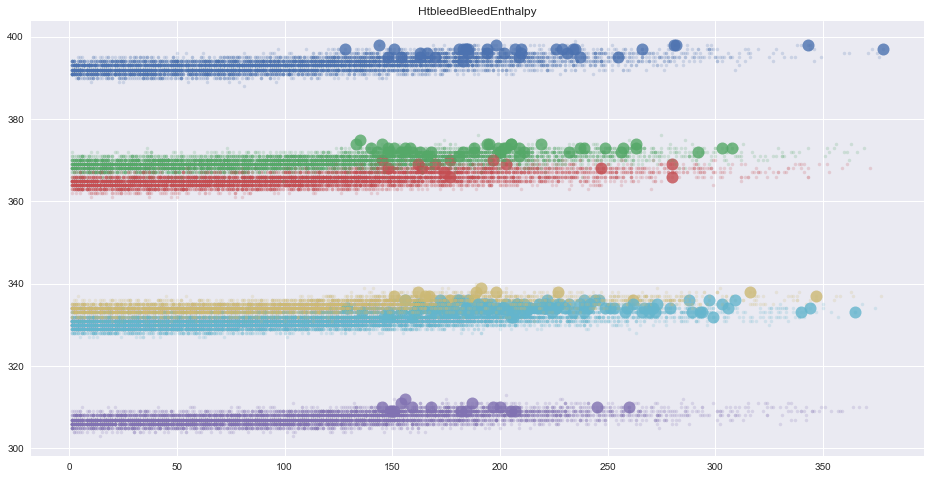

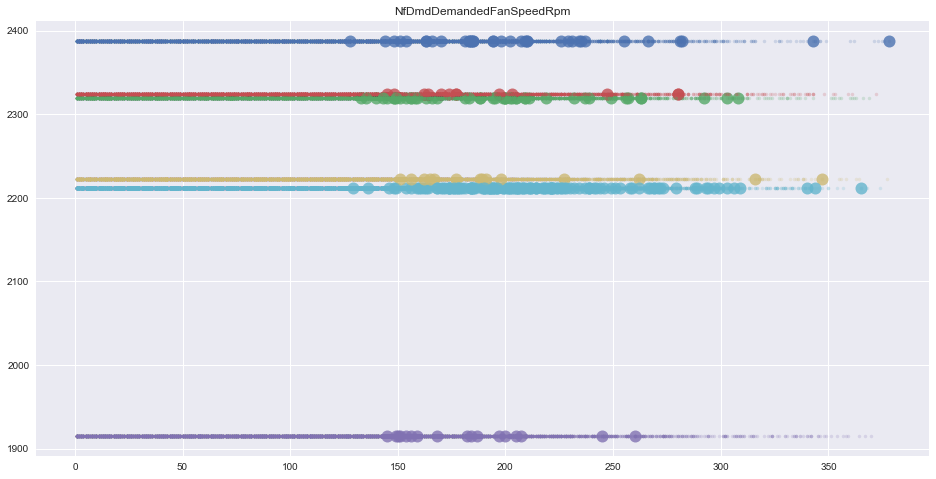

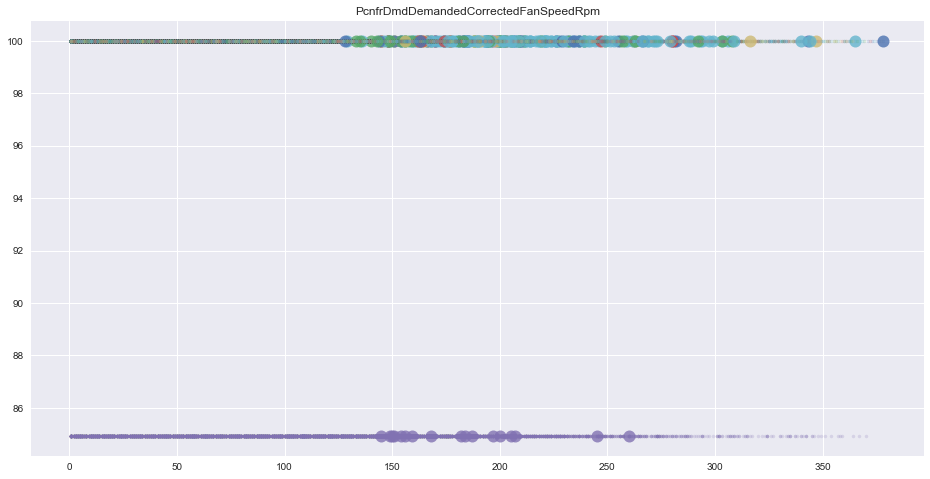

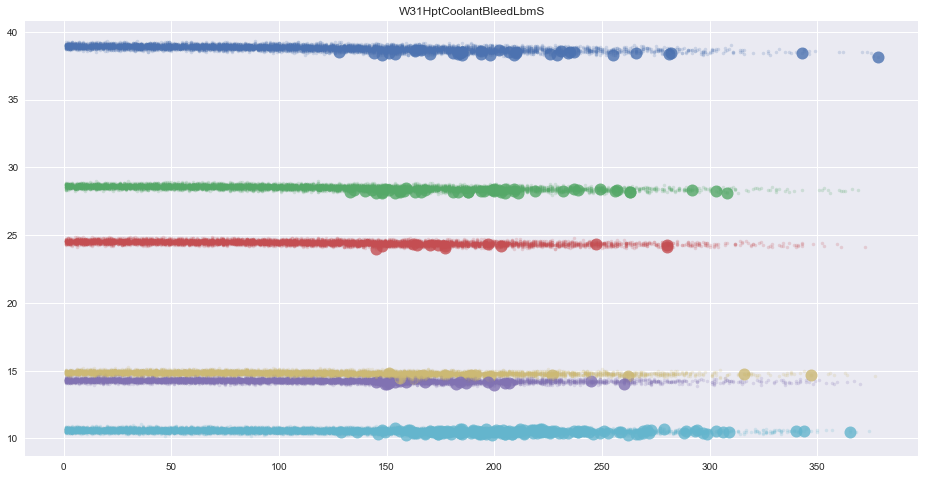

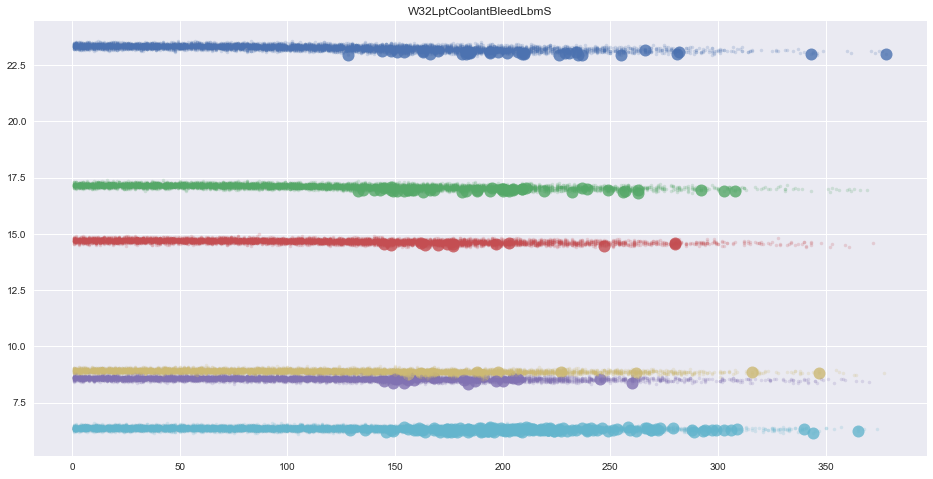

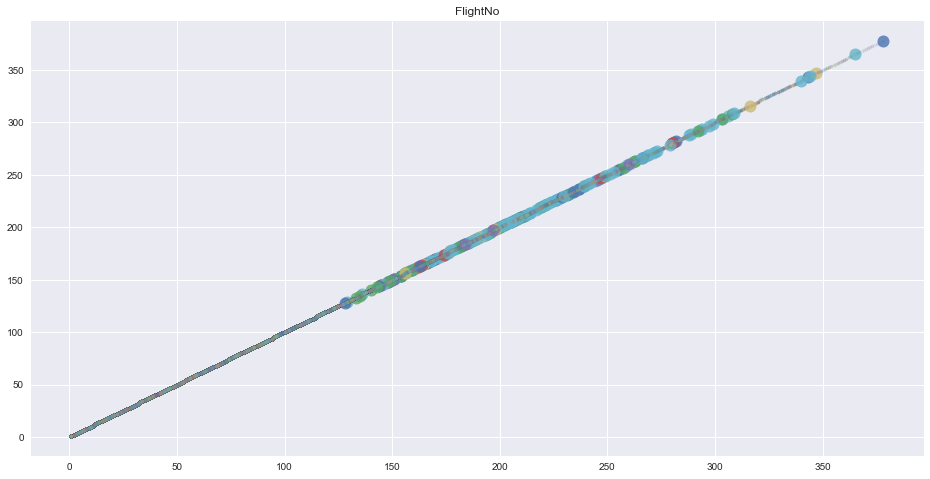

In [14]:
cp = sns.color_palette(n_colors=6)
# 数値データに関して時系列プロットを行う, Regimeで色分け
for c in trn.columns[trn.dtypes != object]:
    plt.figure(figsize=(16, 8))
    plt.title(c)
    for e, g in trn.groupby('Engine'):
        for r, _g in g.groupby(['FlightRegime']):
            plt.plot(_g['FlightNo'], _g[c], '.', c=cp[r-1], alpha=.2)
        last = g[g.FlightNo == g.FlightNo.max()]
        plt.plot(last['FlightNo'], last[c], 'o', markersize=12, c=cp[0], alpha=.8)
    plt.show()